# Matplotlib 数据可视化

本讲义将详细介绍使用 Python 的 Matplotlib 工具实现数据可视化的方法。

 Matplotlib 是建立在 NumPy 数组基础上的多平台数据可视化程序库，最初被设计用于完善 SciPy 的生态环境。John Hunter 在 2002 年提出了 Matplotlib 的构思——希望通过一个 IPython 的补丁，让IPython 命令行可以用 gnuplot 画出类似 MATLAB 风格的交互式图形。但那时 IPython 的作者 Fernando Perez 正忙着写博士论文，就对 John 说自己最近几个月都没时间审核补丁。John 倒觉得是个机会，就把补丁做成了 Matplotlib 程序包，于 2003 年发布了 0.1 版。后来，美国太空望远镜科学研究所（Space Telescope Science Institute，STScI，哈勃望远镜背后的团队，位于约翰霍普金斯大学）选择它作为了画图程序包，并一直为 Matplotlib 开发团队提供资金支持，从而大大扩展了 Matplotlib 的功能。Matplotlib 最重要的特性之一就是具有良好的操作系统兼容性和图形显示底层接口兼容性（graphics backend）。Matplotlib 支持几十种图形显示接口与输出格式，这使得用户无论在哪种操作系统上都可以输出自己想要的图形格式。这种跨平台、面面俱到的特点已经成为Matplotlib 最强大的功能之一，Matplotlib 也因此吸引了大量用户，进而形成了一个活跃的开发者团队，晋升为 Python 科学领域不可或缺的强大武器。
 
 然而近几年，Matplotlib 的界面与风格似乎有点跟不上时代。新的画图工具，如 R 语言中的 ggplot 和 ggvis，都开始使用 D3js 和 HTML5 canvas 构建的网页可视化工具。相比之下，Matplotlib 更显沧桑。但我觉得我们仍然不能放弃 Matplotlib 这样一个功能完善、跨平台的画图引擎。目前，新版的 Matplotlib 已经可以轻松实现主流的绘图风格，人们不断在 Matplotlib 的基础上开发出新的程序包，实现更加简洁、现代化的API，例如 Seaborn、ggplot（http://yhat.github.io/ggplot）、HoloViews（http://holoviews.org）、Altair（http://altair-viz.github.io），以及 Pandas 对 Matplotlib 的 API封装的画图功能。虽然已经有了封装后的高级工具，但是掌握 Matplotlib 的语法更能让你灵活地控制最终的图形结果。因此，即使新工具的出现说明社区正在逐渐放弃直接使用底层的 Matplotlib API 画图的做法，但我依然觉得 Matplotlib 是数据可视化技术中不可或缺的一环。

## General Matplotlib Tips

在深入学习 Matplotlib 数据可视化的功能之前，你需要知道几个 Matplotlib 的使用技巧。

### Importing Matplotlib

就像用 np 作为 NumPy 的简写形式、pd 作为 Pandas 的简写形式一样，我们也可以在导入 Matplotlib 时用一些它常用的简写形式：

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt 是最常用的接口，在本章后面的内容中会经常用到。

### Setting Styles

我们将使用 plt.style 来选择图形的绘图风格。现在选择经典（classic）风格，这样画出的图就都是经典的 Matplotlib 风格了：

In [2]:
plt.style.use('classic')

在后面的内容中，我们将根据需要调整绘图风格。Matplotlib 在 1.5 版之后开始支持不同的风格列表（stylesheets）。如果你用的 Matplotlib 版本较旧，那么就只能使用默认的绘图风格。

### ``show()`` or No ``show()``? How to Display Your Plots

如果数据可视化图不能被看见，那就一点儿用也没有了。但如何显示你的图形，就取决于具体的开发环境了。Matplotlib 的最佳实践与你使用的开发环境有关。简单来说，就是有三种开发环境，分别是脚本、IPython shell 和 IPython Notebook。

#### Plotting from a script

如果你在一个脚本文件中使用 Matplotlib，那么显示图形的时候必须使用 plt.show()。plt.
show() 会启动一个事件循环（event loop），并找到所有当前可用的图形对象，然后打开一
个或多个交互式窗口显示图形。

例如，你现在有一个名为 myplot.py 的文件，代码如下所示：

```python
# ------- file: myplot.py ------
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

plt.show()
```

你可以从命令行工具中执行这个脚本，然后会看到一个新窗口，里面会显示你的图形：

```
$ python myplot.py
```

plt.show() 这行代码在后面完成了许多事情，它需要与你使用的操作系统的图形显示接
口进行交互。虽然具体的操作细节会因操作系统和安装过程不同而有很大的差异，但是
Matplotlib 为你隐藏了所有的细节，非常省心。

不过有一点需要注意，一个 Python 会话（session）中只能使用一次 plt.show()，因此通常
都把它放在脚本的最后。多个 plt.show() 命令会导致难以预料的显示异常，应该尽量避免。

#### Plotting from an IPython shell

 IPython shell 中交互式地使用 Matplotlib 画图非常方便，在
IPython 启动 Matplotlib 模式就可以使用它。为了启用这个模式，你需要在启动 ipython 后
使用 %matplotlib 魔法命令：

```ipython
In [1]: %matplotlib
Using matplotlib backend: TkAgg

In [2]: import matplotlib.pyplot as plt
```

此后的任何 plt 命令都会自动打开一个图形窗口，增加新的命令，图形就会更新。有一
些变化（例如改变已经画好的线条属性）不会自动及时更新；对于这些变化，可以使用
plt.draw() 强制更新。在 IPython shell 中启动 Matplotlib 模式之后，就不需要使用 plt.
show() 了。

#### Plotting from an IPython notebook

IPython Notebook 是一款基于浏览器的交互式数据分析工具，可以将描述性文字、代码、
图形、HTML 元素以及更多的媒体形式组合起来，集成到单个可执行的 Notebook 文档中。

用 IPython Notebook 进行交互式画图与使用 IPython shell 类似，也需要使用 %matplotlib 命
令。你可以将图形直接嵌在 IPython Notebook 页面中，有两种展现形式。

- %matplotlib notebook 会在 Notebook 中启动交互式图形。
- %matplotlib inline 会在 Notebook 中启动静态图形。

本节统一使用 ``%matplotlib inline``:

In [3]:
%matplotlib inline

运行命令之后（每一个 Notebook 核心任务 / 会话只需要运行一次），在每一个 Notebook 的
单元中创建图形就会直接将 PNG 格式图形文件嵌入在单元中

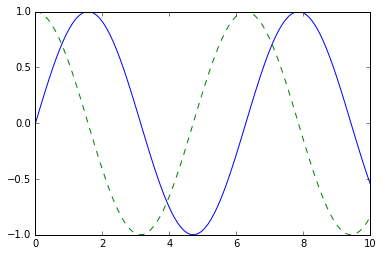

In [4]:
import numpy as np
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

### Saving Figures to File

Matplotlib 的一个优点是能够将图形保存为各种不同的数据格式。你可以用 savefig() 命令
将图形保存为文件。例如，如果要将图形保存为 PNG 格式，你可以运行这行代码：

In [5]:
fig.savefig('my_figure.png')

In [6]:
!ls -lh my_figure.png

-rw-r--r--  1 luohaowen  staff    26K Jul 24 00:14 my_figure.png


为了确定文件中是否保存有我们需要的内容，可以用 IPython 的 Image 对象来显示文件内容

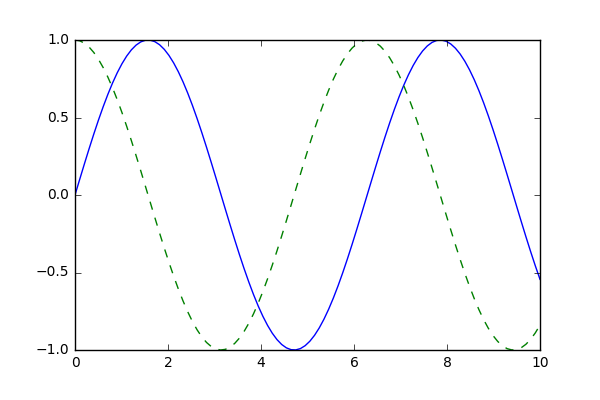

In [7]:
from IPython.display import Image
Image('my_figure.png')

在 savefig() 里面，保存的图片文件格式就是文件的扩展名。Matplotlib 支持许多图形格
式，具体格式由操作系统已安装的图形显示接口决定。你可以通过 canvas 对象的方法查看
系统支持的文件格式：

In [8]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

需要注意的是，当你保存图形文件时，不需要使用 plt.show() 或者前面介绍过的命令

## Two Interfaces for the Price of One

不过 Matplotlib 有一个容易让人混淆的特性，就是它的两种画图接口：一个是便捷的
MATLAB 风格接口，另一个是功能更强大的面向对象接口。下面来快速对比一下两种接
口的主要差异。

#### MATLAB-style Interface

Matplotlib 最初作为 MATLAB 用户的 Python 替 代 品， 许 多 语 法 都 和 MATLAB 类 似。
MATLAB 风格的工具位于 pyplot（plt）接口中。MATLAB 用户肯定对下面的代码特别熟悉

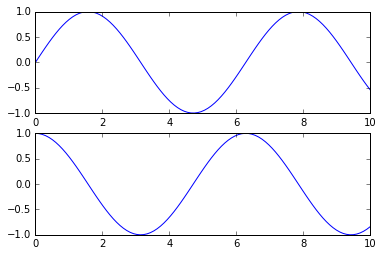

In [9]:
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

这种接口最重要的特性是有状态的（stateful）：它会持续跟踪“当前的”图形和坐标轴，
所有 plt 命令都可以应用。你可以用 plt.gcf()（获取当前图形）和 plt.gca()（获取当前
坐标轴）来查看具体信息。

虽然这个有状态的接口画起图来又快又方便，但是也很容易出问题。例如，当创建上面的
第二个子图时，怎么才能回到第一个子图，并增加新内容呢？虽然用 MATLAB 风格接口
也能实现，但未免过于复杂，好在还有一种更好的办法！

#### Object-oriented interface

面向对象接口可以适应更复杂的场景，更好地控制你自己的图形。在面向对象接口中，画
图函数不再受到当前“活动”图形或坐标轴的限制，而变成了显式的 Figure 和 Axes 的方 法。通过下面的代码，可以用面向对象接口重新创建之前的图形

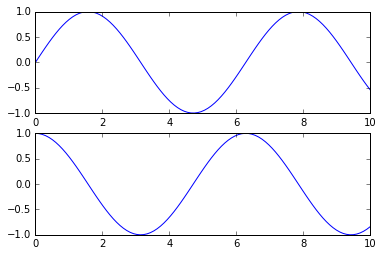

In [10]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

虽然在画简单图形时，选择哪种绘图风格主要看个人喜好，但是在画比较复杂的图形时，
面向对象方法会更方便。在本章中，我们将在 MATLAB 风格接口与面向对象接口间来回
转换，具体内容根据实际情况而定。在绝大多数场景中，plt.plot() 与 ax.plot() 的差异
非常小。

# Simple Line Plots

在所有图形中，最简单的应该就是线性方程 y = f (x) 的可视化了。来看看如何创建这个简
单的线形图。接下来的内容都是在 Notebook 中画图，因此需要导入以下命令：

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

要画 Matplotlib 图形时，都需要先创建一个图形 fig 和一个坐标轴 ax。创建图形与坐标轴
的最简单做法如下所示

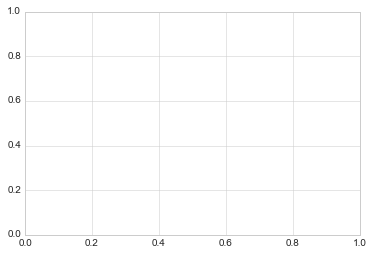

In [12]:
fig = plt.figure()
ax = plt.axes()

在 Matplotlib 里面，figure（plt.Figure 类的一个实例）可以被看成是一个能够容纳各种坐
标轴、图形、文字和标签的容器。就像你在图中看到的那样，axes（plt.Axes 类的一个实
例）是一个带有刻度和标签的矩形，最终会包含所有可视化的图形元素。在本书中，我们
通常会用变量 fig 表示一个图形实例，用变量 ax 表示一个坐标轴实例或一组坐标轴实例。
创建好坐标轴之后，就可以用 ax.plot 画图了。从一组简单的正弦曲线（sinusoid）开始

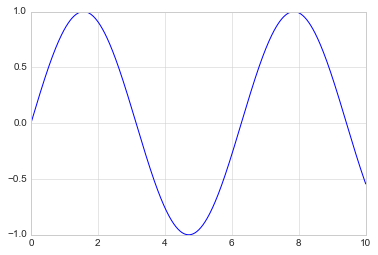

In [13]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));

另外也可以用 pylab 接口画图，这时图形与坐标轴都在底层执行

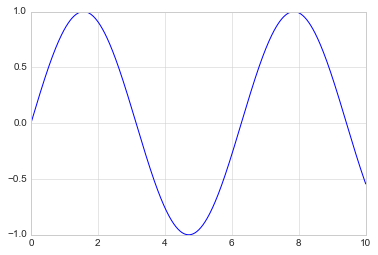

In [14]:
plt.plot(x, np.sin(x));

如果想在一张图中创建多条线，可以重复调用 plot 命令

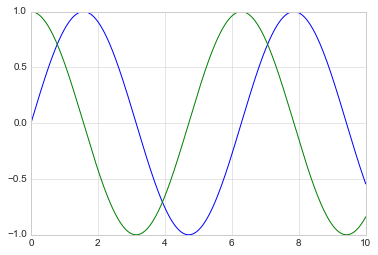

In [15]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

在 Matplotlib 中画简单的函数就是如此简单！下面将介绍更多关于如何控制坐标轴和线条
外观的具体配置方法。

## Adjusting the Plot: Line Colors and Styles

通常对图形的第一次调整是调整它线条的颜色与风格。plt.plot() 函数可以通过相应的参
数设置颜色与风格。要修改颜色，就可以使用 color 参数，它支持各种颜色值的字符串。
颜色的不同表示方法如下所示

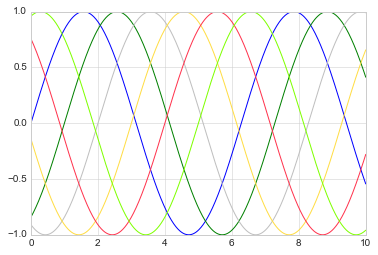

In [16]:
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

如果不指定颜色，Matplotlib 就会为多条线自动循环使用一组默认的颜色。

与之类似，你也可以用 linestyle 调整线条的风格

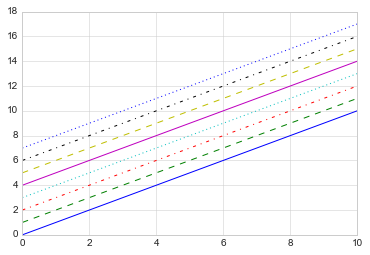

In [17]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

如果你想用一种更简洁的方式，则可以将 linestyle 和 color 编码组合起来，作为 plt.
plot() 函数的一个非关键字参数使用

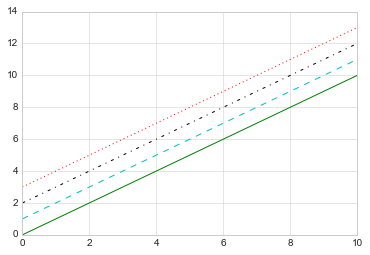

In [18]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red

这些单字符颜色代码是 RGB（Red/Green/Blue）与 CMYK（Cyan/Magenta/Yellow/blacK）
颜色系统中的标准缩写形式，通常用于数字化彩色图形。

还有很多其他用来调整图像的关键字参数。若想了解更多的细节，建议你用 IPython 的帮
助工具查看 plt.plot() 函数的程序文档

## Adjusting the Plot: Axes Limits

虽然 Matplotlib 会自动为你的图形选择最合适的坐标轴上下限，但是有时自定义坐标轴上
下限可能会更好。调整坐标轴上下限最基础的方法是 plt.xlim() 和 plt.ylim()

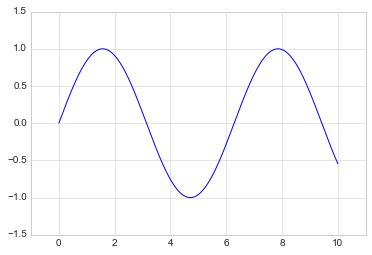

In [19]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

如果你想要让坐标轴逆序显示，那么也可以逆序设置坐标轴刻度值

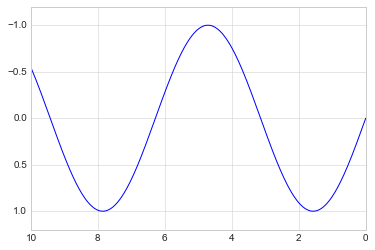

In [20]:
plt.plot(x, np.sin(x))

plt.xlim(10, 0)
plt.ylim(1.2, -1.2);

还有一个方法是 plt.axis()（注意不要搞混 axes 和 axis）。通过传入 [xmin, xmax,
ymin, ymax] 对应的值，plt.axis() 方法可以让你用一行代码设置 x 和 y 的限值

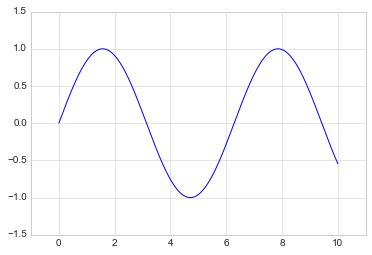

In [21]:
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5]);

plt.axis() 能做的可不止如此，它还可以按照图形的内容自动收紧坐标轴，不留空白区域

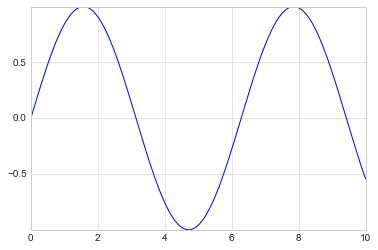

In [22]:
plt.plot(x, np.sin(x))
plt.axis('tight');

你还可以实现更高级的配置，例如让屏幕上显示的图形分辨率为 1:1，x 轴单位长度与 y 轴
单位长度相等

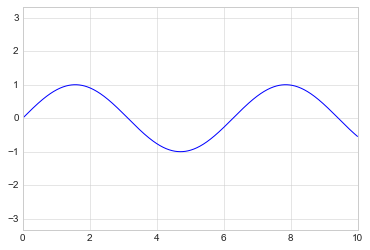

In [23]:
plt.plot(x, np.sin(x))
plt.axis('equal');

关于 plt.axis() 方法设置坐标轴上下限和其他更多功能，请参考 plt.axis() 的程序文档。

## Labeling Plots

本节的最后一部分将简要介绍设置图形标签的方法：图形标题、坐标轴标题、简易图例。

图形标题与坐标轴标题是最简单的标签，快速设置方法如下所示

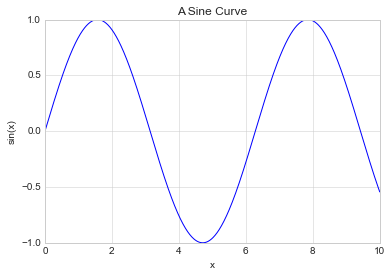

In [24]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");

你可以通过优化参数来调整这些标签的位置、大小和风格。若想获取更多的信息，请参考
Matplotlib 文档和对应函数的程序文档。

在单个坐标轴上显示多条线时，创建图例显示每条线是很有效的方法。Matplotlib 内置了
一个简单快速的方法，可以用来创建图例，那就是（估计你也猜到了）plt.legend()。虽
然有不少用来设置图例的办法，但我觉得还是在 plt.plot 函数中用 label 参数为每条线设
置一个标签最简单

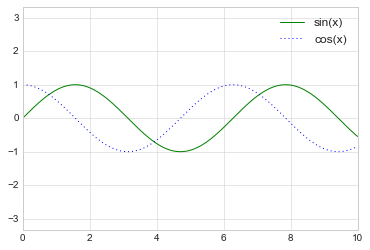

In [25]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend();

你会发现，plt.legend() 函数会将每条线的标签与其风格、颜色自动匹配。关于通过 plt.
legend() 设置图例的更多信息，请参考相应的程序文档。

# Simple Scatter Plots

另一种常用的图形是简易散点图（scatter plot），与线形图类似。这种图形不再由线段连接，
而是由独立的点、圆圈或其他形状构成。开始的时候同样需要在 Notebook 中导入函数：

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

## Scatter Plots with ``plt.plot``

上一节介绍了用 plt.plot/ax.plot 画线形图的方法，现在用这些函数来画散点图

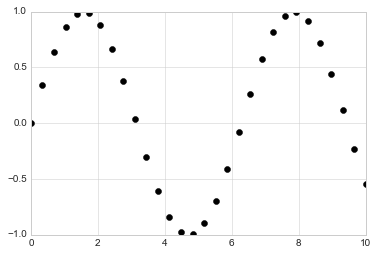

In [27]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');

函数的第三个参数是一个字符，表示图形符号的类型。与你之前用 '-' 和 '--' 设置线条属
性类似，对应的图形标记也有缩写形式。所有的缩写形式都可以在 plt.plot 文档中查到，
也可以参考 Matplotlib 的在线文档。绝大部分图形标记都非常直观，我们在这里演示一部分

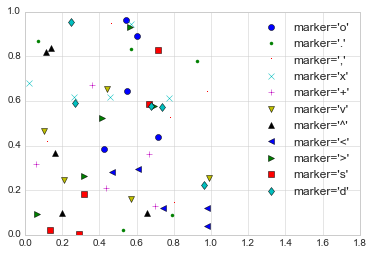

In [28]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

这些代码还可以与线条、颜色代码组合起来，画出一条连接散点的线

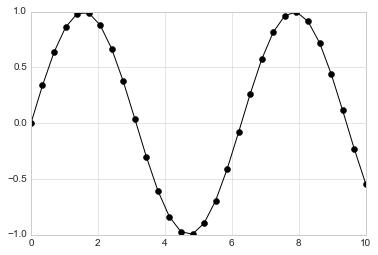

In [29]:
plt.plot(x, y, '-ok');

另外，plt.plot 支持许多设置线条和散点属性的参数

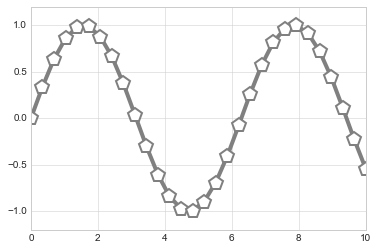

In [30]:
plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2);

plt.plot 函数非常灵活，可以满足各种不同的可视化配置需求。关于具体配置的完整描
述，请参考 plt.plot 文档。

## Scatter Plots with ``plt.scatter``

另一个可以创建散点图的函数是 plt.scatter。它的功能非常强大，其用法与 plt.plot 函
数类似

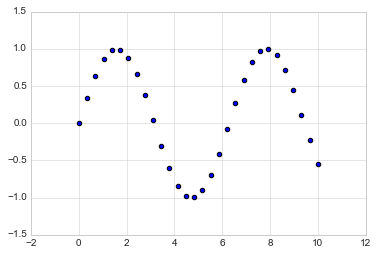

In [31]:
plt.scatter(x, y, marker='o');

plt.scatter 与 plt.plot 的主要差别在于，前者在创建散点图时具有更高的灵活性，可以
单独控制每个散点与数据匹配，也可以让每个散点具有不同的属性（大小、表面颜色、边
框颜色等）。

下面来创建一个随机散点图，里面有各种颜色和大小的散点。为了能更好地显示重叠部
分，用 alpha 参数来调整透明度

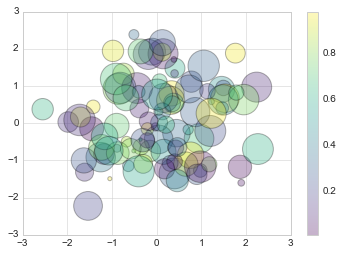

In [32]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

请注意，颜色自动映射成颜色条（color scale，通过 colorbar() 显示），散点的大小以像素
为单位。这样，散点的颜色与大小就可以在可视化图中显示多维数据的信息了。

例如，可以用 Scikit-Learn 程序库里面的鸢尾花（iris）数据来演示。它里面有三种鸢尾花，
每个样本是一种花，其花瓣（petal）与花萼（sepal）的长度与宽度都经过了仔细测量

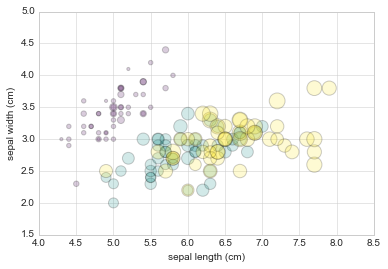

In [33]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

散点图可以让我们同时看到不同维度的数据：每个点的坐标值 (x, y) 分别表示花萼的长度
和宽度，而点的大小表示花瓣的宽度，三种颜色对应三种不同类型的鸢尾花。这类多颜色
与多特征的散点图在探索与演示数据时非常有用。

# Density and Contour Plots

有时在二维图上用等高线图或者彩色图来表示三维数据是个不错的方法。Matplotlib 提供
了三个函数来解决这个问题：用 plt.contour 画等高线图、用 plt.contourf 画带有填充色
的等高线图（filled contour plot）的色彩、用 plt.imshow 显示图形。这节将用这三个函数介
绍一些示例。首先打开一个 Notebook，然后导入画图需要用的函数：

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

## Visualizing a Three-Dimensional Function

首先用函数 z = f (x, y) 演示一个等高线图，按照下面的方式生成函数 f（在 Numpy 讲义已经介绍
过，当时用它来演示数组的广播功能）样本数据：

In [35]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

等高线图可以用 plt.contour 函数来创建。它需要三个参数：x 轴、y 轴、z 轴三个坐标
轴的网格数据。x 轴与 y 轴表示图形中的位置，而 z 轴将通过等高线的等级来表示。用
np.meshgrid 函数来准备这些数据可能是最简单的方法，它可以从一维数组构建二维网格
数据：

In [36]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

现在来看看标准的线形等高线图

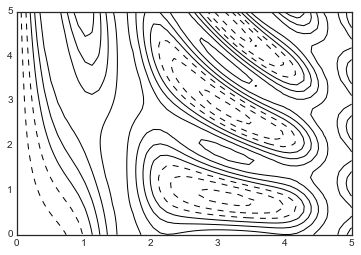

In [37]:
plt.contour(X, Y, Z, colors='black');

需要注意的是，当图形中只使用一种颜色时，默认使用虚线表示负数，使用实线表示正
数。另外，你可以用 cmap 参数设置一个线条配色方案来自定义颜色。还可以让更多的线
条显示不同的颜色——可以将数据范围等分为 20 份，然后用不同的颜色表示

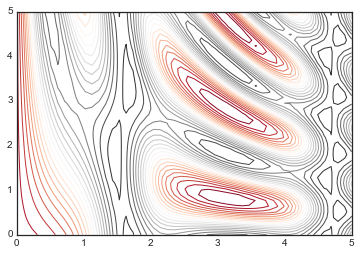

In [38]:
plt.contour(X, Y, Z, 20, cmap='RdGy');

现在使用 RdGy（红 - 灰，Red-Gray 的缩写）配色方案，这对于数据集中度的显示效果比较
好。Matplotlib 有非常丰富的配色方案，你可以在 IPython 里用 Tab 键浏览 plt.cm 模块对
应的信息：

```
plt.cm.<TAB>
```

虽然这幅图看起来漂亮多了，但是线条之间的间隙还是有点大 。我们可以通过 plt.contourf()
函数来填充等高线图（需要注意结尾有字母 f），它的语法和 plt.contour() 是一样的。

另外还可以通过 plt.colorbar() 命令自动创建一个表示图形各种颜色对应标签信息的颜色条

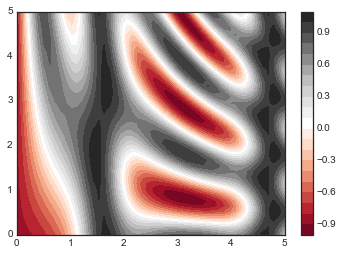

In [39]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

通过颜色条可以清晰地看出，黑色区域是“波峰”（peak），红色区域是“波谷”（valley）。

但是图形还有一点不尽如人意的地方，就是看起来有点儿“污渍斑斑”，不是那么干净。
这是由于颜色的改变是一个离散而非连续的过程，这并不是我们想要的效果。你当然可以
通过将等高线的数量设置得非常多来解决这个问题，但是最终获得的图形性能会很不好，
因为 Matplotlib 必须渲染每一级的等高线。其实有更好的做法，那就是通过 plt.imshow()
函数来处理，它可以将二维数组渲染成渐变图。

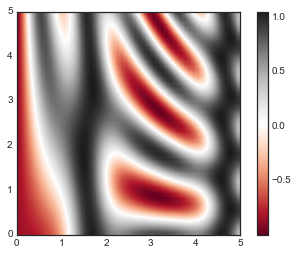

In [40]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy')
plt.colorbar()
plt.axis();

但是，使用 imshow() 函数时有一些注意事项。

- plt.imshow() 不支持用 x 轴和 y 轴数据设置网格，而是必须通过 extent 参数设置图形的坐标范围 [xmin, xmax, ymin, ymax]。
- plt.imshow() 默认使用标准的图形数组定义，就是原点位于左上角（浏览器都是如此），而不是绝大多数等高线图中使用的左下角。这一点在显示网格数据图形的时候必须调整。
- plt.imshow() 会 自 动 调 整 坐 标 轴 的 精 度 以 适 应 数 据 显 示。 你 可 以 通 过 plt.axis(aspect='image') 来设置 x 轴与 y 轴的单位。

最后还有一个可能会用到的方法，就是将等高线图与彩色图组合起来。例如，如果我们想
创建下图的效果，就需要用一幅背景色半透明的彩色图（可以通过 alpha 参数设置透
明度），与另一幅坐标轴相同、带数据标签的等高线图叠放在一起（用 plt.clabel() 函数
实现）

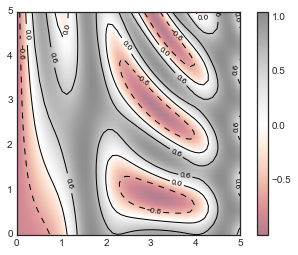

In [41]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar();

将 plt.contour、plt.contourf 与 plt.imshow 这三个函数组合起来之后，就打开了用二维
图画三维数据的无尽可能。关于这些函数的更多信息，请参考相应的程序文档。

# Histograms, Binnings, and Density

一个简易的频次直方图可以是理解数据集的良好开端。在前面的内容中，我们见过了
Matplotlib 的频次直方图函数（详情请参见 2.6 节）。只要导入了画图的函数，只用一行代
码就可以创建一个简易的频次直方图

In [42]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

data = np.random.randn(1000)
print(data.shape, np.max(data), np.min(data))

(1000,) 3.466782859483327 -3.071970692649248


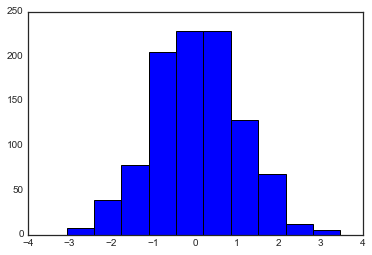

In [43]:
plt.hist(data);

hist() 有许多用来调整计算过程和显示效果的选项，下面是一个更加个性化的频次直方图

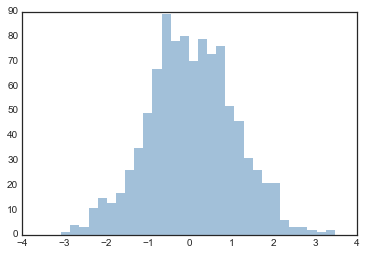

In [44]:
plt.hist(data, bins=30, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

关于 plt.hist 自定义选项的更多内容都在它的程序文档中。我发现在用频次直方图对不同
分布特征的样本进行对比时，将 histtype='stepfilled' 与透明性设置参数 alpha 搭配使用
的效果非常好

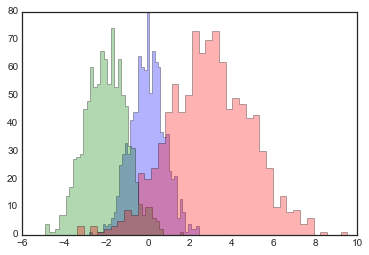

In [45]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40)

plt.hist(x1, **kwargs);
plt.hist(x2, **kwargs);
plt.hist(x3, **kwargs);

如果你只需要简单地计算频次直方图（就是计算每段区间的样本数），而并不想画图显示
它们，那么可以直接用 np.histogram()：

In [46]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)
print(bin_edges)

[ 47 283 456 197  17]
[-3.07197069 -1.76421998 -0.45646927  0.85128144  2.15903215  3.46678286]


## Two-Dimensional Histograms and Binnings

就像将一维数组分为区间创建一维频次直方图一样，我们也可以将二维数组按照二维区
间进行切分，来创建二维频次直方图。下面将简单介绍几种创建二维频次直方图的方法。
首先，用一个多元高斯分布（multivariate Gaussian distribution）生成 x 轴与 y 轴的样本
数据：

In [47]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T
print(x, y)

[-1.09752154  0.20067631  0.12502478 ...  1.74479743  1.37157558
 -0.10133352] [ 0.14384775  1.86448167  0.90233737 ...  0.369783    0.50592671
 -0.65779821]


### ``plt.hist2d``: Two-dimensional histogram

画二维频次直方图最简单的方法就是使用 Matplotlib 的 plt.hist2d 函数

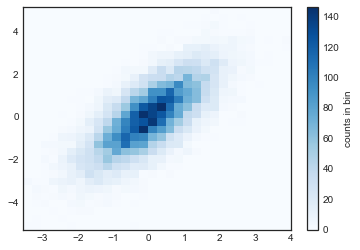

In [48]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

与 plt.hist 函数一样，plt.hist2d 也有许多调整图形与区间划分的配置选项，详细内容都
在程序文档中。另外，就像 plt.hist 有一个只计算结果不画图的 np.histogram 函数一样，
plt.hist2d 类似的函数是 np.histogram2d，其用法如下所示：

In [49]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)

关于二维以上的频次直方图区间划分方法的具体内容，请参考 np.histogramdd 函数的程序文档。

### ``plt.hexbin``: Hexagonal binnings

二维频次直方图是由与坐标轴正交的方块分割而成的，还有一种常用的方式是用正六边
形分割。Matplotlib 提供了 plt.hexbin 满足此类需求，将二维数据集分割成蜂窝状

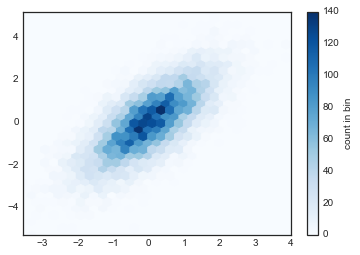

In [50]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

plt.hexbin 同样也有一大堆有趣的配置选项，包括为每个数据点设置不同的权重，以及用
任意 NumPy 累计函数改变每个六边形区间划分的结果（权重均值、标准差等指标）。

### Kernel density estimation

还有一种评估多维数据分布密度的常用方法是核密度估计(kernel density estimation， KDE)。现在来简单地演示如何用 KDE 方法“抹掉”空间中离散的数据点，从而拟合出一个平滑的函数。在 scipy.stats 程序包里面有一个简单快速的 KDE 实现方法，下面就是用这个方法演示的简单示例:

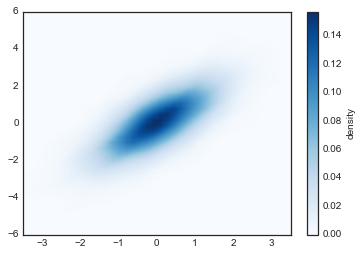

In [51]:
from scipy.stats import gaussian_kde

# fit an array of size [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6],
           cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")

KDE 方法通过不同的平滑带宽长度(smoothing length)在拟合函数的准确性与平滑性之间作出权衡(无处不在的偏差与方差的取舍问题的一个例子)。想找到恰当的平滑带宽长度是件很困难的事，gaussian_kde 通过一种经验方法试图找到输入数据平滑长度的近似最优解。

在 SciPy 的生态系统中还有其他的 KDE 方法实现，每种版本都有各自的优缺点，例 如 sklearn.neighbors.KernelDensity 和 statsmodels.nonparametric.kernel_density. KDEMultivariate。用 Matplotlib 做 KDE 的可视化图的过程比较繁琐，Seaborn 程序库提供了一个更加简洁的 API 来创建基于 KDE 的可视化图。


# Visualizing Errors

对任何一种科学测量方法来说，准确地衡量数据误差都是无比重要的事情，甚至比数据本身还要重要。举个例子，假如我要用一种天文学观测手段评估哈勃常数(the Hubble Constant)——银河外星系相对地球退行速度与距离的比值。我知道目前的公认值大约是 71(km/s) / Mpc，而我用自己的方法测得的值是 74(km/s) / Mpc。那么，我的测量值可信吗?如果仅知道一个数据，是不可能知道是否可信的。

假如我现在知道了数据可能存在的不确定性:当前的公认值大概是 71±2.5(km/s) / Mpc， 而我的测量值是 74±5(km/s) / Mpc。那么现在我的数据与公认值一致吗?这个问题可以从定量的角度进行回答。

在数据可视化的结果中用图形将误差有效地显示出来，就可以提供更充分的信息。


## Basic Errorbars

基本误差线(errorbar)可以通过一个 Matplotlib 函数来创建:

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

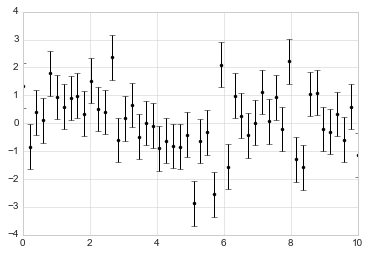

In [53]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k');

其中，fmt 是一种控制线条和点的外观的代码格式，语法与 plt.plot 的缩写代码相同，详情请参见关于简易散点图的部分。

除了基本选项之外，errorbar 还有许多改善结果的选项。通过这些额外的选项，你可以轻松自定义误差线图形的绘画风格。我的经验是，让误差线的颜色比数据点的颜色浅一点效果会非常好，尤其是在那些比较密集的图形中:

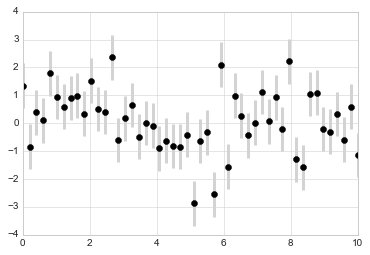

In [54]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);

除了这些选项之外，你还可以设置水平方向的误差线(xerr)、单侧误差线(one-sided errorbar)，以及其他形式的误差线。关于误差线的更多选项，请参考 plt.errorbar 的程序文档。

## Continuous Errors

有时候可能需要显示连续变量的误差。虽然 Matplotlib 没有内置的简便方法可以解决这个问题，但是通过 plt.plot 与 plt.fill_between 来解决也不是很难。

我们将用 Scikit-Learn 程序库 API 里面一个简单的高斯过程回归方法(Gaussian process regression，GPR)来演示。这是用一种非常灵活的非参数方程(nonparametric function)对 带有不确定性的连续测量值进行拟合的方法。这里不会详细介绍高斯过程回归方法的具体内容，而是将注意力放在数据可视化上面:

In [55]:
from sklearn.gaussian_process import GaussianProcess

# define the model and draw some data
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# Compute the Gaussian process fit
gp = GaussianProcess(corr='cubic', theta0=1e-2, thetaL=1e-4, thetaU=1E-1,
                     random_start=100)
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 1000)
yfit, MSE = gp.predict(xfit[:, np.newaxis], eval_MSE=True)
dyfit = 2 * np.sqrt(MSE)  # 2*sigma ~ 95% confidence region

ImportError: cannot import name 'GaussianProcess' from 'sklearn.gaussian_process' (/Users/luohaowen/miniconda3/envs/summer2/lib/python3.8/site-packages/sklearn/gaussian_process/__init__.py)

现在，我们获得了 xfit、yfit 和 dyfit，表示数据的连续拟合结果。接着，如上所示将这 些数据传入 plt.errorbar 函数。但是我们并不是真的要为 1000 个数据点画上 1000 条误差线;相反，可以通过在 plt.fill_between 函数中设置颜色来表示连续误差线:

In [ ]:
# Visualize the result
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')

plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
                 color='gray', alpha=0.2)
plt.xlim(0, 10);

请注意，我们将 fill_between 函数设置为:首先传入 x 轴坐标值，然后传入 y 轴下边界以及 y 轴上边界，这样整个区域就被误差线填充了。

从结果图形中可以非常直观地看出高斯过程回归方法拟合的效果:在接近样本点的区域，模型受到很强的约束，拟合误差非常小，非常接近真实值;而在远离样本点的区域，模型不受约束，误差不断增大。

若想获取更多关于 plt.fill_between() 函数(以及它与 plt.fill() 的紧密关系)选项的信息，请参考函数文档或者 Matplotlib 文档。



# Customizing Plot Legends

想在可视化图形中使用图例，可以为不同的图形元素分配标签。前面介绍过如何创建简单
的图例，现在将介绍如何在 Matplotlib 中自定义图例的位置与艺术风格。
可以用 plt.legend() 命令来创建最简单的图例，它会自动创建一个包含每个图形元素的图例:

In [56]:
import matplotlib.pyplot as plt
plt.style.use('classic')

In [57]:
%matplotlib inline
import numpy as np

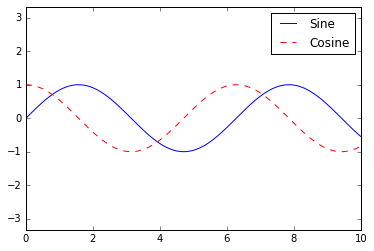

In [58]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend();

但是，我们经常需要对图例进行各种个性化的配置。例如，我们想设置图例的位置，并取消外边框:

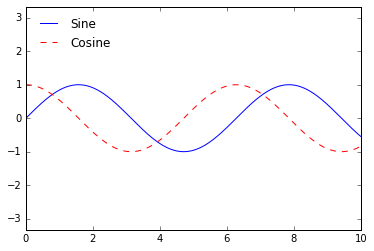

In [59]:
ax.legend(loc='upper left', frameon=False)
fig

还可以用 ncol 参数设置图例的标签列数：

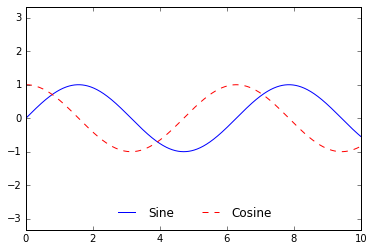

In [60]:
ax.legend(frameon=False, loc='lower center', ncol=2)
fig

还可以为图例定义圆角边框(fancybox)、增加阴影、改变外边框透明度(framealpha 值)，
或者改变文字间距：

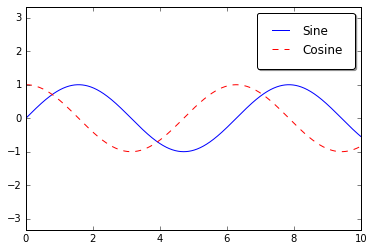

In [61]:
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

关于图例的更多配置信息，请参考 plt.legend 程序文档。

## Choosing Elements for the Legend

我们已经看到，图例会默认显示所有元素的标签。如果你不想显示全部，可以通过一些图形命令来指定显示图例中的哪些元素和标签。plt.plot() 命令可以一次创建多条线，返回线条实例列表。一种方法是将需要显示的线条传入 plt.legend()，另一种方法是只为需要在图例中显示的线条设置标签:

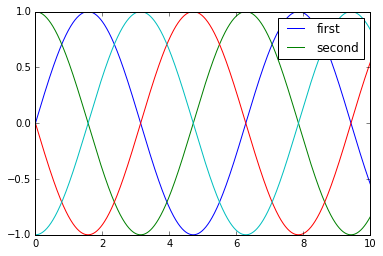

In [62]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

# lines is a list of plt.Line2D instances
plt.legend(lines[:2], ['first', 'second']);

在实践中，我发现第一种方法更清晰。当然也可以只为需要在图例中显示的元素设置标签：

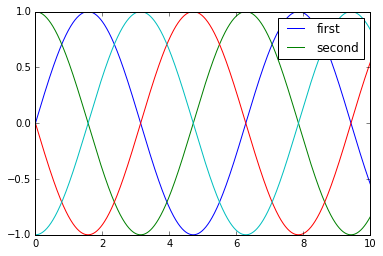

In [63]:
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(framealpha=1, frameon=True);

需要注意的是，默认情况下图例会忽略那些不带标签的元素。

## Legend for Size of Points

有时，默认的图例仍然不能满足我们的可视化需求。例如，你可能需要用不同尺寸的点来 表示数据的特征，并且希望创建这样的图例来反映这些特征。下面的示例将用点的尺寸来 表明美国加州不同城市的人口数量。如果我们想要一个通过不同尺寸的点显示不同人口数 量级的图例，可以通过隐藏一些数据标签来实现这个效果：

In [65]:
import pandas as pd
cities = pd.read_csv('data/california_cities.csv')

# Extract the data we're interested in
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

# Scatter the points, using size and color but no label
plt.scatter(lon, lat, label=None,
            c=np.log10(population), cmap='viridis',
            s=area, linewidth=0, alpha=0.5)
plt.axis(aspect='equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# Here we create a legend:
# we'll plot empty lists with the desired size and label
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')

plt.title('California Cities: Area and Population');

FileNotFoundError: [Errno 2] No such file or directory: 'data/california_cities.csv'

由于图例通常是图形中对象的参照，因此如果我们想显示某种形状，就需要将它画出来。
但是在这个示例中，我们想要的对象(灰色圆圈)并不在图形中，因此把它们用空列表假装画出来。还需要注意的是，图例只会显示带标签的元素。
为了画出这些空列表中的图形元素，需要为它们设置标签，以便图例可以显示它们，这样就可以从图例中获得想要的信息了。这个策略对于创建复杂的可视化图形很有效。
最后需要注意的是，在处理这类地理数据的时候，如果能把州的地理边界或其他地图元素也显示出来，那么图形就会更加逼真。Matplotlib 的 Basemap(底图)插件工具箱恰好是做这种事情的最佳选择。

## Multiple Legends

有时，我们可能需要在同一张图上显示多个图例。不过，用 Matplotlib 解决这个问题并不 容易，因为通过标准的 legend 接口只能为一张图创建一个图例。如果你想用 plt.legend() 或 ax.legend() 方法创建第二个图例，那么第一个图例就会被覆盖。但是，我们可以通 过从头开始创建一个新的图例艺术家对象(legend artist)，然后用底层的(lower-level) ax.add_artist() 方法在图上添加第二个图例：

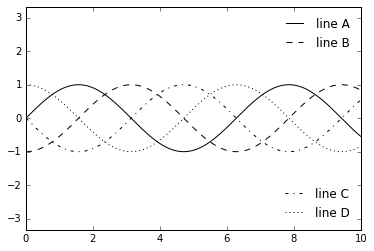

In [66]:
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),
                     styles[i], color='black')
ax.axis('equal')

# specify the lines and labels of the first legend
ax.legend(lines[:2], ['line A', 'line B'],
          loc='upper right', frameon=False)

# Create the second legend and add the artist manually.
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],
             loc='lower right', frameon=False)
ax.add_artist(leg);

这里只是小试了一下构成 Matplotlib 图形的底层图例艺术家对象。如果你查看过 ax.legend() 的源代码(前面介绍过，在 IPython Notebook 里面用 ax.legend?? 来显示源代码)，就会发 现这个函数通过几条简单的逻辑就创建了一个 Legend 图例艺术家对象，然后被保存到了 legend_ 属性里。当图形被画出来之后，就可以将该图例增加到图形上。

# Customizing Colorbars

图例通过离散的标签表示离散的图形元素。然而，对于图形中由彩色的点、线、面构成的连续标签，用颜色条来表示的效果比较好。在 Matplotlib 里面，颜色条是一个独立的坐标轴，可以指明图形中颜色的含义。首先还是导入需要使用的画图工具:

In [67]:
import matplotlib.pyplot as plt
plt.style.use('classic')

In [68]:
%matplotlib inline
import numpy as np

和在前面看到的一样，通过 plt.colorbar 函数就可以创建最简单的颜色条:

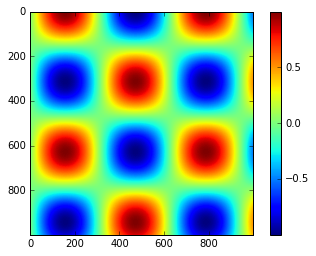

In [69]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar();

下面将介绍一些颜色条的个性化配置方法，让你能将它们有效地应用于不同场景中。

## Customizing Colorbars

可以通过 cmap 参数为图形设置颜色条的配色方案：

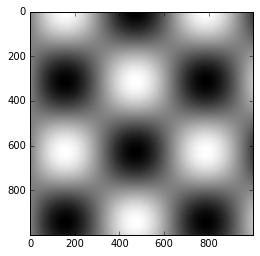

In [70]:
plt.imshow(I, cmap='gray');

所有可用的配色方案都在 plt.cm 命名空间里面，在 IPython 里通过 Tab 键就可以查看所有的配置方案:

     plt.cm.<TAB>
     
有了这么多能够作为备选的配色方案只是第一步，更重要的是如何确定用哪种方案!最终的选择结果可能和你一开始想用的有很大不同。


### Choosing the Colormap

关于可视化图形颜色选择的全部知识超出了本文档的介绍范围，但如果你想了解与此相关
的入门知识，可以参考文章“Ten Simple Rules for Better Figures”(http://bit.ly/2fDJn9J)。 Matplotlib 的在线文档中也有关于配色方案选择的有趣论述(http://matplotlib.org/1.4.1/ users/colormaps.html)。
一般情况下，你只需要重点关注三种不同的配色方案。

顺序配色方案
由一组连续的颜色构成的配色方案(例如 binary 或 viridis)。 

互逆配色方案
通常由两种互补的颜色构成，表示正反两种含义(例如 RdBu 或 PuOr)。 

定性配色方案
随机顺序的一组颜色(例如 rainbow 或 jet)。

jet 是一种定性配色方案，曾是 Matplotlib 2.0 之前所有版本的默认配色方案。把它作为默 认配色方案实在不是个好主意，因为定性配色方案在对定性数据进行可视化时的选择空间 非常有限。随着图形亮度的提高，经常会出现颜色无法区分的问题。
可以通过把 jet 转换为黑白的灰度图看看具体的颜色

In [71]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """Return a grayscale version of the given colormap"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # convert RGBA to perceived grayscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
        
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)
    

def view_colormap(cmap):
    """Plot a colormap with its grayscale equivalent"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize=(6, 2),
                           subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

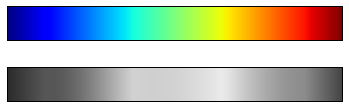

In [72]:
view_colormap('jet')

注意观察灰度图里比较亮的那部分条纹。这些亮度变化不均匀的条纹在彩色图中对应某一 段彩色区间，由于色彩太接近容易突显出数据集中不重要的部分，导致眼睛无法识别重点。更好的配色方案是 viridis(已经成为 Matplotlib 2.0 的默认配色方案)。它采用了精心 设计的亮度渐变方式，这样不仅便于视觉观察，而且转换成灰度图后也更清晰：

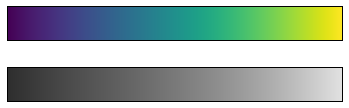

In [73]:
view_colormap('viridis')

如果你喜欢彩虹效果，可以用 cubehelix 配色方案来可视化连续的数值：

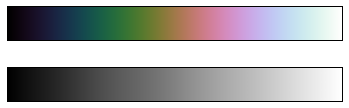

In [74]:
view_colormap('cubehelix')

至于其他的场景，例如要用两种颜色表示正反两种含义时，可以使用 RdBu 双色配色方案 (红色 - 蓝色，Red-Blue 简称)。但正如下图所示，用红色、蓝色表示的正反两种信息在灰度图上看不出差别!

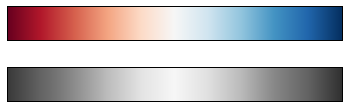

In [75]:
view_colormap('RdBu')

我们将在后面的部分中继续使用这些配色方案。
Matplotlib 里面有许多配色方案，在 IPython 里面用 Tab 键浏览 plt.cm 模块就可以看到所
有内容。关于 Python 语言中配色的更多基本原则，可以参考 Seaborn 程序库的工具和文档(see [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb)).

### Color limits and extensions

Matplotlib 提供了丰富的颜色条配置功能。由于可以将颜色条本身仅看作是一个 plt.Axes 实例，因此前面所学的所有关于坐标轴和刻度值的格式配置技巧都可以派上用场。颜色条 有一些有趣的特性。例如，我们可以缩短颜色取值的上下限，对于超出上下限的数据，通 过 extend 参数用三角箭头表示比上限大的数或者比下限小的数。这种方法很简单，比如你 想展示一张噪点图：

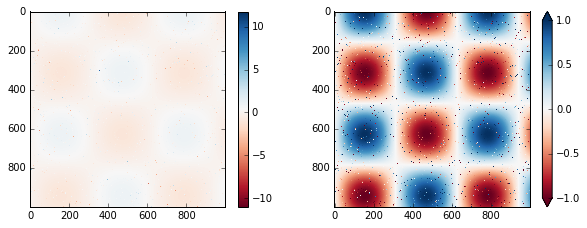

In [76]:
# make noise in 1% of the image pixels
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

plt.figure(figsize=(10, 3.5))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1);

左边那幅图是用默认的颜色条刻度限制实现的效果，噪点的范围完全覆盖了我们感兴趣的数据。而右边的图形设置了颜色条的刻度上下限，并在上下限之外增加了扩展功能，这样的数据可视化图形显然更有效果。

### Discrete Color Bars

虽然颜色条默认都是连续的，但有时你可能也需要表示离散数据。最简单的做法就是使用
plt.cm.get_cmap() 函数，将适当的配色方案的名称以及需要的区间数量传进去即可：

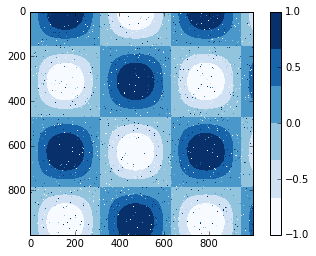

In [77]:
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(-1, 1);

这种离散型颜色条和其他颜色条的用法相同。

## Example: Handwritten Digits

让我们来看一些有趣的手写数字可视化图，这可能是一个比较实用的案例。数据在 Scikit-Learn 里面，包含近 2000 份 8×8 的手写数字缩略图。
先下载数据，然后用 plt.imshow() 对一些图形进行可视化:

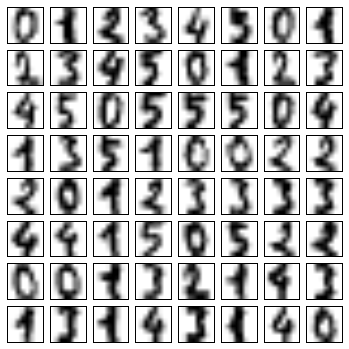

In [78]:
# load images of the digits 0 through 5 and visualize several of them
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)

fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

由于每个数字都由 64 像素的色相(hue)构成，因此可以将每个数字看成是一个位于 64 维空间的点，即每个维度表示一个像素的亮度。但是想通过可视化来描述如此高维度的空 间是非常困难的。一种解决方案是通过降维技术，在尽量保留数据内部重要关联性的同时降低数据的维度，例如流形学习(manifold learning)。降维是无监督学习的重要内容。

暂且不提具体的降维细节，先来看看如何用流形学习将这些数据投影到二维空间进行可视化：

In [79]:
# project the digits into 2 dimensions using IsoMap
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data);

/Users/luohaowen/miniconda3/envs/summer2/lib/python3.8/site-packages/sklearn/manifold/_isomap.py:348: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/luohaowen/miniconda3/envs/summer2/lib/python3.8/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


我们将用离散型颜色条来显示结果，调整 ticks 与 clim 参数来改善颜色条：

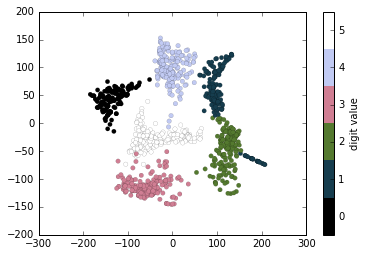

In [80]:
# plot the results
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,
            c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)

这个投影结果还向我们展示了一些数据集的有趣特性。例如，数字 5 与数字 3 在投影中有 大面积重叠，说明一些手写的 5 与 3 难以区分，因此自动分类算法也更容易搞混它们。其他的数字，像数字 0 与数字 1，隔得特别远，说明两者不太可能出现混淆。这个观察结果也符合我们的直观感受，因为 5 和 3 看起来确实要比 0 和 1 更像。

# Multiple Subplots

有时候需要从多个角度对数据进行对比。Matplotlib 为此提出了子图(subplot)的概念:在较大的图形中同时放置一组较小的坐标轴。这些子图可能是画中画(inset)、网格图(grid of plots)，或者是其他更复杂的布局形式。我们将介绍四种用 Matplotlib 创建子图的方法。首先，在 Notebook 中导入画图需要的程序库:

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

## ``plt.axes``: Subplots by Hand

创建坐标轴最基本的方法就是使用 plt.axes 函数。前面已经介绍过，这个函数的默认配置是创建一个标准的坐标轴，填满整张图。它还有一个可选参数，由图形坐标系统的四个值构成。这四个值分别表示图形坐标系统的 [bottom, left, width, height] (底坐标、左坐标、宽度、高度)，数值的取值范围是左下角(原点)为 0，右上角为 1。
如果想要在右上角创建一个画中画，那么可以首先将 x 与 y 设置为 0.65(就是坐标轴原点位于图形高度 65% 和宽度 65% 的位置)，然后将 x 与 y 扩展到 0.2(也就是将坐标轴的宽度与高度设置为图形的 20%)。

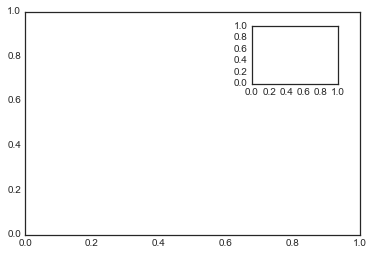

In [82]:
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

面向对象画图接口中类似的命令有 fig.add_axes()。用这个命令创建两个竖直排列的坐标轴：

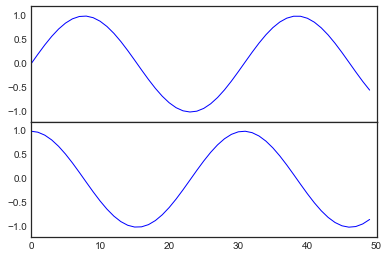

In [83]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

现在就可以看到两个紧挨着的坐标轴(上面的坐标轴没有刻度):上子图(起点 y 坐标为
0.5 位置)与下子图的 x 轴刻度是对应的(起点 y 坐标为 0.1，高度为 0.4)。

## ``plt.subplot``: Simple Grids of Subplots

若干彼此对齐的行列子图是常见的可视化任务，Matplotlib 拥有一些可以轻松创建它们的 简便方法。最底层的方法是用 plt.subplot() 在一个网格中创建一个子图。这个命令有三个整型参数——将要创建的网格子图行数、列数和索引值，索引值从 1 开始，从左上角到右下角依次增大：

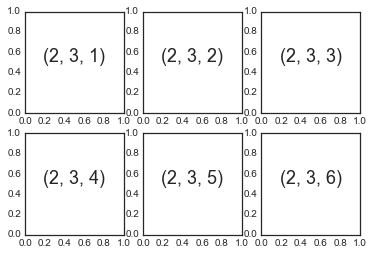

In [84]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

plt.subplots_adjust 命令可以调整子图之间的间隔。用面向对象接口的命令 fig.add_
subplot() 可以取得同样的效果:

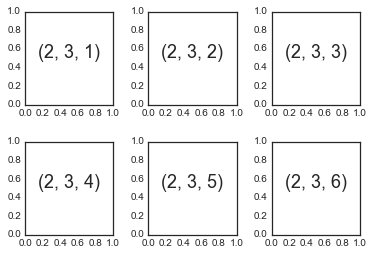

In [85]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

我们通过 plt.subplots_adjust 的 hspace 与 wspace 参数设置与图形高度与宽度一致的子图间距，数值以子图的尺寸为单位(在本例中，间距是子图宽度与高度的 40%)。

## ``plt.subplots``: The Whole Grid in One Go

当你打算创建一个大型网格子图时，就没办法使用前面那种亦步亦趋的方法了，尤其是当 你想隐藏内部子图的 x 轴与 y 轴标题时。出于这一需求，plt.subplots() 实现了你想要的 功能(需要注意此处 subplots 结尾多了个 s)。这个函数不是用来创建单个子图的，而是 用一行代码创建多个子图，并返回一个包含子图的 NumPy 数组。关键参数是行数与列数， 以及可选参数 sharex 与 sharey，通过它们可以设置不同子图之间的关联关系。
我们将创建一个 2×3 网格子图，每行的 3 个子图使用相同的 y 轴坐标，每列的 2 个子图 使用相同的 x 轴坐标:

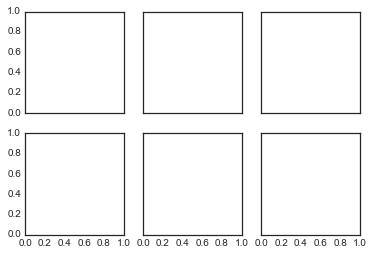

In [86]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

设置 sharex 与 sharey 参数之后，我们就可以自动去掉网格内部子图的标签，让图形看起 来更整洁。坐标轴实例网格的返回结果是一个 NumPy 数组，这样就可以通过标准的数组 取值方式轻松获取想要的坐标轴了：

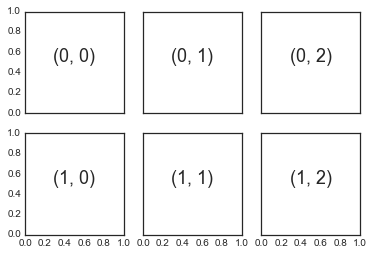

In [87]:
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

与 plt.subplot()1 相比，plt.subplots() 与 Python 索引从 0 开始的习惯保持一致。

## ``plt.GridSpec``: More Complicated Arrangements

如果想实现不规则的多行多列子图网格，plt.GridSpec() 是最好的工具。plt.GridSpec() 对象本身不能直接创建一个图形，它只是 plt.subplot() 命令可以识别的简易接口。例如， 一个带行列间距的 2×3 网格的配置代码如下所示:

In [88]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

可以通过类似 Python 切片的语法设置子图的位置和扩展尺寸:

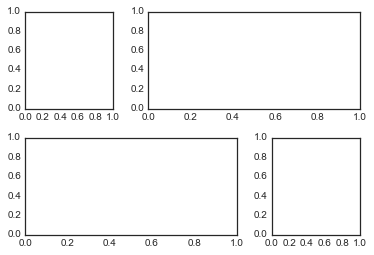

In [89]:
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

这种灵活的网格排列方式用途十分广泛，我经常会用它来创建如图 4-66 所示的多轴频次直
方图(multi-axes histogram)：

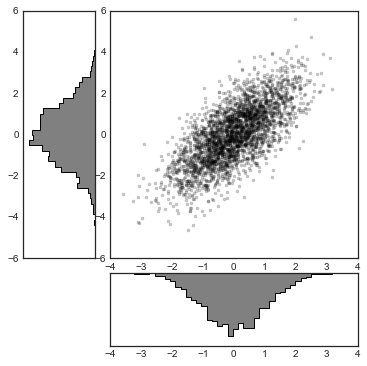

In [90]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

这种类型的分布图十分常见，Seaborn 程序包提供了专门的 API 来实现它们，更多细节参见 [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb).

# Text and Annotation

一个优秀的可视化作品就是给读者讲一个精彩的故事。虽然在一些场景中，这个故事可以 完全通过视觉来表达，不需要任何多余的文字。但在另外一些场景中，辅之以少量的文字 提示(textual cue)和标签是必不可少的。虽然最基本的注释(annotation)类型可能只是坐标轴标题与图标题，但注释可远远不止这些。让我们可视化一些数据，看看如何通过添 加注释来更恰当地表达信息。还是先在 Notebook 里面导入画图需要用到的一些函数:

In [91]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd

## Example: Effect of Holidays on US Births

在这个案例中，我们画了一幅图表示美国每一年的出生人数。数据可以在 https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv 下载。
首先用清洗方法处理数据，然后画出结果：

In [92]:
births = pd.read_csv('data/births.csv')

quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]

FileNotFoundError: [Errno 2] No such file or directory: 'data/births.csv'

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

在用这样的图表达观点时，如果可以在图中增加一些注释，就更能吸引读者的注意了。可以通过 plt.text/ ax.text 命令手动添加注释，它们可以在具体的 x / y 坐标点上放上文字：

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
style = dict(size=10, color='gray')

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

ax.text 方法需要一个 x 轴坐标、一个 y 轴坐标、一个字符串和一些可选参数，比如文字 的颜色、字号、风格、对齐方式以及其他文字属性。这里用了 ha='right' 与 ha='center'， ha 是水平对齐方式(horizonal alignment)的缩写。关于配置参数的更多信息，请参考 plt.text() 与 mpl.text.Text() 的程序文档。

## Transforms and Text Position

前面的示例将文字放在了目标数据的位置上。但有时候可能需要将文字放在与数据无关的位置上，比如坐标轴或者图形中。在 Matplotlib 中，我们通过调整坐标变换(transform)来实现。

任何图形显示框架都需要一些变换坐标系的机制。例如，当一个位于 (x, y) = (1, 1) 位置的 点需要以某种方式显示在图上特定的位置时，就需要用屏幕的像素来表示。用数学方法处 理这种坐标系变换很简单，Matplotlib 有一组非常棒的工具可以实现类似功能(这些工具 位于 matplotlib.transforms 子模块中)。
虽然一般用户并不需要关心这些变换的细节，但是了解这些知识对在图上放置文字大有帮助。一共有三种解决这类问题的预定义变换方式。

ax.transData
 以数据为基准的坐标变换。

ax.transAxes
以坐标轴为基准的坐标变换(以坐标轴维度为单位)。

fig.transFigure
以图形为基准的坐标变换(以图形维度为单位)。 

下面举一个例子，用三种变换方式将文字画在不同的位置：


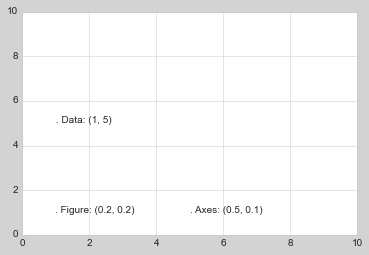

In [93]:
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])

# transform=ax.transData is the default, but we'll specify it anyway
ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData)
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure);

默认情况下，上面的文字在各自的坐标系中都是左对齐的。这三个字符串开头的 . 字符基
本就是对应的坐标位置。
transData 坐标用 x 轴与 y 轴的标签作为数据坐标。transAxes 坐标以坐标轴(图中白色矩形)左下角的位置为原点，按坐标轴尺寸的比例呈现坐标。transFigure 坐标与之类似，不过是以图形(图中灰色矩形)左下角的位置为原点，按图形尺寸的比例呈现坐标。
需要注意的是，假如你改变了坐标轴上下限，那么只有 transData 坐标会受影响，其他坐标系都不变：

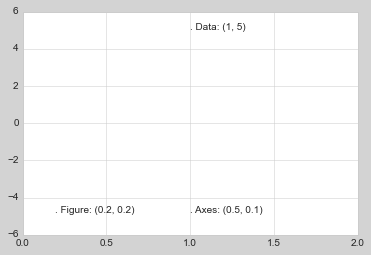

In [94]:
ax.set_xlim(0, 2)
ax.set_ylim(-6, 6)
fig

如果你改变了坐标轴上下限，那么就可以更清晰地看到刚刚所说的变化。如果你是在 Notebook 里运行以上代码的，那么可以把 %matplotlib inline 改成 %matplotlib notebook， 然后用图形菜单与图形交互(拖动按钮即可)，就可以实现坐标轴平移了。

## Arrows and Annotation

除了刻度线和文字，简单的箭头也是一种有用的注释标签。

在 Matplotlib 里面画箭头通常比你想象的要困难。虽然有一个 plt.arrow() 函数可以实现这 个功能，但是我不推荐使用它，因为它创建出的箭头是 SVG 向量图对象，会随着图形分 辨率的变化而改变，最终的结果可能完全不是用户想要的。我要推荐的是 plt.annotate() 函数。这个函数既可以创建文字，也可以创建箭头，而且它创建的箭头能够进行非常灵活 的配置。

下面用 annotate 的一些配置选项来演示：

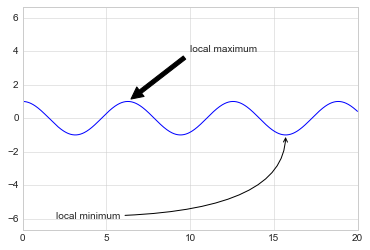

In [95]:
%matplotlib inline

fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));

箭头的风格是通过 arrowprops 字典控制的，里面有许多可用的选项。由于这些选项在 Matplotlib 的官方文档中都有非常详细的介绍，我就不再赘述，仅做一点儿功能演示。让我们用前面的美国出生人数图来演示一些箭头注释：

NameError: name 'births_by_date' is not defined

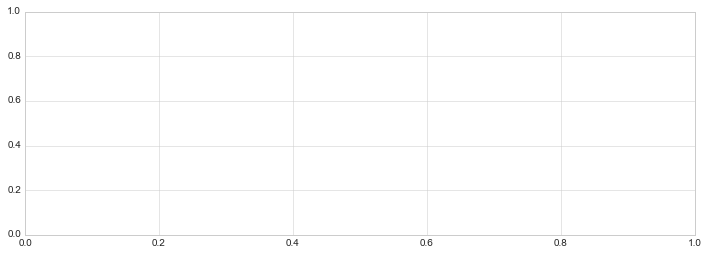

In [96]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
ax.annotate("New Year's Day", xy=('2012-1-1', 4100),  xycoords='data',
            xytext=(50, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"))

ax.annotate("Independence Day", xy=('2012-7-4', 4250),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

ax.annotate('Labor Day', xy=('2012-9-4', 4850), xycoords='data', ha='center',
            xytext=(0, -20), textcoords='offset points')
ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
            xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })

ax.annotate('Halloween', xy=('2012-10-31', 4600),  xycoords='data',
            xytext=(-80, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('Thanksgiving', xy=('2012-11-25', 4500),  xycoords='data',
            xytext=(-120, -60), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=80,rad=20"))


ax.annotate('Christmas', xy=('2012-12-25', 3850),  xycoords='data',
             xytext=(-30, 0), textcoords='offset points',
             size=13, ha='right', va="center",
             bbox=dict(boxstyle="round", alpha=0.1),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

ax.set_ylim(3600, 5400);

你可能已经注意到了，箭头和文本框的配置功能非常细致，这样你就可以创建自己想要的 箭头风格了。不过，功能太过细致往往也就意味着操作起来比较复杂，如果真要做一个产 品级的图形，可能得耗费大量的时间。最后我想说一句，前面适用的混合风格并不是数据 可视化的最佳实践，仅仅是为演示一些功能而已。
关于箭头和注释风格的更多介绍与示例，可以在 Matplotlib 的画廊(gallery)中看到，尤其推荐[Annotation Demo](http://matplotlib.org/examples/pylab_examples/annotation_demo2.html)这个例子.

# Customizing Ticks

虽然 Matplotlib 默认的坐标轴定位器(locator)与格式生成器(formatter)可以满足大部分 需求，但是并非对每一幅图都合适。本节将通过一些示例演示如何将坐标轴刻度调整为你 需要的位置与格式。

在介绍示例之前，我们最好先对 Matplotlib 图形的对象层级有更深入的理解。Matplotlib 的 目标是用 Python 对象表现任意图形元素。例如，想想前面介绍的 figure 对象，它其实就 是一个盛放图形元素的包围盒(bounding box)。可以将每个 Matplotlib 对象都看成是子对象(sub-object)的容器，例如每个 figure 都会包含一个或多个 axes 对象，每个 axes 对象 又会包含其他表示图形内容的对象。

坐标轴刻度线也不例外。每个 axes 都有 xaxis 和 yaxis 属性，每个属性同样包含构成坐标 轴的线条、刻度和标签的全部属性。

## Major and Minor Ticks

每一个坐标轴都有主要刻度线与次要刻度线。顾名思义，主要刻度往往更大或更显著，而 次要刻度往往更小。虽然一般情况下 Matplotlib 不会使用次要刻度，但是你会在对数图中 看到它们：

In [97]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np

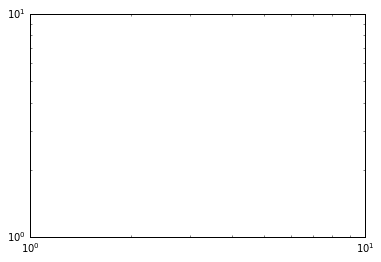

In [98]:
ax = plt.axes(xscale='log', yscale='log')
ax.grid();

我们发现每个主要刻度都显示为一个较大的刻度线和标签，而次要刻度都显示为一个较小
的刻度线，且不显示标签。

可以通过设置每个坐标轴的 formatter 与 locator 对象，自定义这些刻度属性(包括刻度
线的位置和标签)。来检查一下图形 x 轴的属性:

In [99]:
print(ax.xaxis.get_major_locator())
print(ax.xaxis.get_minor_locator())

In [100]:
print(ax.xaxis.get_major_formatter())
print(ax.xaxis.get_minor_formatter())

我们会发现，主要刻度标签和次要刻度标签的位置都是通过一个 LogLocator 对象(在对数 图中可以看到)设置的。然而，次要刻度有一个 NullFormatter 对象处理标签，这样标签就不会在图上显示了。

下面来演示一些示例，看看不同图形的定位器与格式生成器是如何设置的。

## Hiding Ticks or Labels

最常用的刻度 / 标签格式化操作可能就是隐藏刻度与标签了，可以通过 plt.NullLocator()
与 plt.NullFormatter() 实现，如下所示：

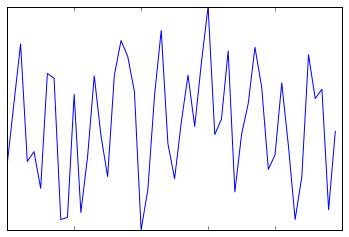

In [101]:
ax = plt.axes()
ax.plot(np.random.rand(50))

ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())

需要注意的是，我们移除了 x 轴的标签(但是保留了刻度线 / 网格线)，以及 y 轴的刻度 (标签也一并被移除)。在许多场景中都不需要刻度线，比如当你想要显示一组图形时。举个例子，像下图那样包含不同人脸的照片，就是经常用于研究有监督机器学习问题的示例。

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/luohaowen/scikit_learn_data


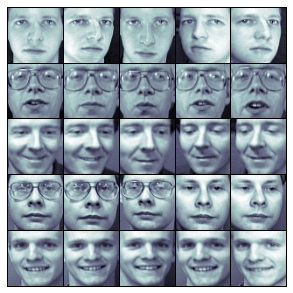

In [102]:
fig, ax = plt.subplots(5, 5, figsize=(5, 5))
fig.subplots_adjust(hspace=0, wspace=0)

# Get some face data from scikit-learn
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces().images

for i in range(5):
    for j in range(5):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax[i, j].imshow(faces[10 * i + j], cmap="bone")

需要注意的是，由于每幅人脸图形默认都有各自的坐标轴，然而在这个特殊的可视化场景中，刻度值(本例中是像素值)的存在并不能传达任何有用的信息，因此需要将定位器设 置为空。

## Reducing or Increasing the Number of Ticks

默认刻度标签有一个问题，就是显示较小图形时，通常刻度显得十分拥挤。我们可以在下图的网格中看到类似的问题:

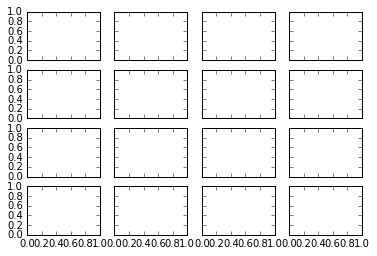

In [103]:
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)

尤其是 x 轴，数字几乎都重叠在一起，辨识起来非常困难。我们可以用 plt.MaxNLocator() 来解决这个问题，通过它可以设置最多需要显示多少刻度。根据设置的最多刻度数量， Matplotlib 会自动为刻度安排恰当的位置：

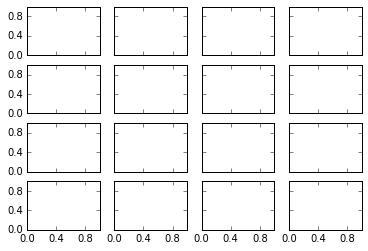

In [104]:
# For every axis, set the x and y major locator
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))
fig

这样图形就显得更简洁了。如果你还想要获得更多的配置功能，那么可以试试 plt.
MultipleLocator，我们将在接下来的内容中介绍它。

## Fancy Tick Formats

Matplotlib 默认的刻度格式可以满足大部分的需求。虽然默认配置已经很不错了，但是有 时候你可能需要更多的功能，例如下图中的正弦曲线和余弦曲线:

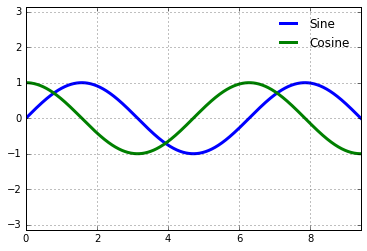

In [105]:
# Plot a sine and cosine curve
fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sine')
ax.plot(x, np.cos(x), lw=3, label='Cosine')

# Set up grid, legend, and limits
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0, 3 * np.pi);

我们可能想稍稍改变一下这幅图。首先，如果将刻度与网格线画在 π 的倍数上，图形
会更加自然。可以通过设置一个 MultipleLocator 来实现，它可以将刻度放在你提供的数值的倍数上。为了更好地测量，在 π/4 的倍数上添加主要刻度和次要刻度：

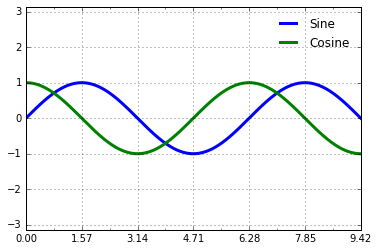

In [106]:
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
fig

然而，这些刻度标签看起来有点奇怪:虽然我们知道它们是 π 的倍数，但是用小数表示圆 周率不太直观。因此，我们可以用刻度格式生成器来修改。由于没有内置的格式生成器可 以直接解决问题，因此需要用 plt.FuncFormatter 来实现，用一个自定义的函数设置不同 刻度标签的显示：

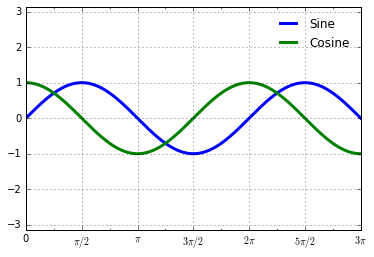

In [107]:
def format_func(value, tick_number):
    # find number of multiples of pi/2
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N % 2 > 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N // 2)

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig

这样就好看多啦!其实我们已经用了 Matplotlib 支持 LaTeX 的功能，在数学表达式两侧加 上美元符号($)，这样可以非常方便地显示数学符号和数学公式。在这个示例中，"$\pi$" 就表示圆周率符合 π。

当你准备展示或打印图形时，plt.FuncFormatter() 不仅可以为自定义图形刻度提供十分灵 活的功能，而且用法非常简单。

## Summary of Formatters and Locators

前面已经介绍了一些格式生成器与定位器，下面用表格简单地总结一下内置的格式生成器与定位器选项。关于两者更详细的信息，请参考各自的程序文档或者 Matplotlib 的在线文档。以下的所有类都在 plt 命名空间内。

Locator class        | Description
---------------------|-------------
``NullLocator``      | No ticks
``FixedLocator``     | Tick locations are fixed
``IndexLocator``     | Locator for index plots (e.g., where x = range(len(y)))
``LinearLocator``    | Evenly spaced ticks from min to max
``LogLocator``       | Logarithmically ticks from min to max
``MultipleLocator``  | Ticks and range are a multiple of base
``MaxNLocator``      | Finds up to a max number of ticks at nice locations
``AutoLocator``      | (Default.) MaxNLocator with simple defaults.
``AutoMinorLocator`` | Locator for minor ticks



Formatter Class       | Description
----------------------|---------------
``NullFormatter``     | No labels on the ticks
``IndexFormatter``    | Set the strings from a list of labels
``FixedFormatter``    | Set the strings manually for the labels
``FuncFormatter``     | User-defined function sets the labels
``FormatStrFormatter``| Use a format string for each value
``ScalarFormatter``   | (Default.) Formatter for scalar values
``LogFormatter``      | Default formatter for log axes

我们将在之后看到使用这些功能的更多示例。

# Customizing Matplotlib: Configurations and Stylesheets

Matplotlib 的默认图形设置经常被用户诟病。虽然 Matplotlib 2.0 版本已经有大幅改善，但
是掌握自定义配置的方法可以让我们打造自己的艺术风格。

首先简单浏览一下 Matplotlib 的运行时配置(runtime configuration，rc)功能的介绍，然后
再看看新式的样式表(stylesheets)特性，里面包含了许多漂亮的默认配置功能。

## Plot Customization by Hand

我们已经知道如何修改单个图形配置，使得最终图形比原来的图形更好 看。可以为每个单独的图形进行个性化设置。举个例子，看看由下面这个土到掉渣的默认 配置生成的频次直方图：

In [108]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np

%matplotlib inline

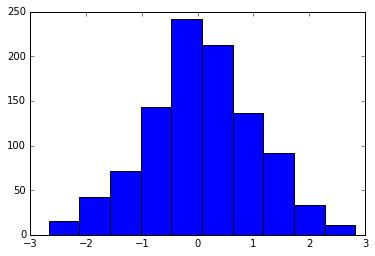

In [109]:
x = np.random.randn(1000)
plt.hist(x);

通过手动调整，可以让它美观许多，最终效果如图：

In [110]:
# use a gray background
ax = plt.axes(axisbg='#E6E6E6')
ax.set_axisbelow(True)

# draw solid white grid lines
plt.grid(color='w', linestyle='solid')

# hide axis spines
for spine in ax.spines.values():
    spine.set_visible(False)
    
# hide top and right ticks
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# lighten ticks and labels
ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')
    
# control face and edge color of histogram
ax.hist(x, edgecolor='#E6E6E6', color='#EE6666');

AttributeError: 'AxesSubplot' object has no property 'axisbg'

<Figure size 432x288 with 0 Axes>

这样看起来就漂亮多了。你可能会觉得它的风格与 R 语言的 ggplot 可视化程序包有点儿 像。但这样设置可太费劲儿了!我们肯定不希望每做一个图都需要这样手动配置一番。好 在已经有一种方法，可以让我们只配置一次默认图形，就能将其应用到所有图形上。

## Changing the Defaults: ``rcParams``

Matplotlib 每次加载时，都会定义一个运行时配置(rc)，其中包含了所有你创建的图形元 素的默认风格。你可以用 plt.rc 简便方法随时修改这个配置。来看看如何调整 rc 参数， 用默认图形实现之前手动调整的效果。
先复制一下目前的 rcParams 字典，这样可以在修改之后再还原回来:

In [111]:
IPython_default = plt.rcParams.copy()

现在就可以用 plt.rc 函数来修改配置参数了:

In [112]:
from matplotlib import cycler
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

设置完成之后，来创建一个图形看看效果：

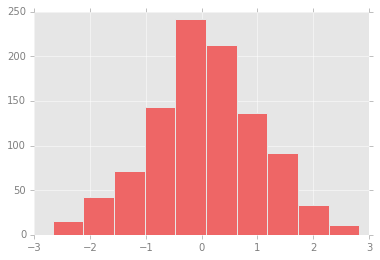

In [113]:
plt.hist(x);

再画一些线图看看 rc 参数的效果：

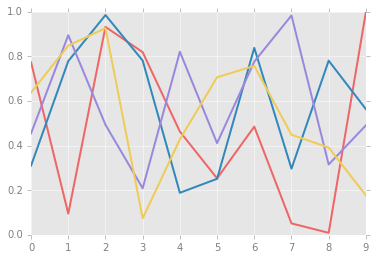

In [114]:
for i in range(4):
    plt.plot(np.random.rand(10))

新的艺术风格比之前的默认风格更漂亮了。如果你不认同我的审美风格，当然可以自 己调整 rc 参数，创造自己的风格!这些设置会保存在 .matplotlibrc 文件中，你可以在 Matplotlib 文档(http://matplotlib.org/users/customizing.html)中找到更多信息。这时有人说 了，他们更喜欢自定义 Matplotlib 的样式表。

## Stylesheets

2014 年 8 月发布的 Matplotlib 1.4 版本中增加了一个非常好用的 style 模块，里面包含了大 量的新式默认样式表，还支持创建和打包你自己的风格。虽然这些样式表实现的格式功能 与前面介绍的 .matplotlibrc 文件类似，但是它的文件扩展名是 .mplstyle。

即使你不打算创建自己的绘图风格，样式表包含的默认内容也非常有用。通过 plt.style. available 命令可以看到所有可用的风格，下面将简单介绍前五种风格:

In [115]:
plt.style.available[:5]

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh']

使用某种样式表的基本方法如下所示:
```
      plt.style.use('stylename')
```

但需要注意的是，这样会改变后面所有的风格!如果需要，你可以使用风格上下文管理器 (context manager)临时更换至另一种风格:
```
      with plt.style.context('stylename'):
          make_a_plot()
```
来创建一个可以画两种基本图形的函数:

In [116]:
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a', 'b', 'c'], loc='lower left')

下面就用这个函数来演示不同风格的显示效果。

### Default style

默认风格就是前面内容中一直使用的风格，我们就从这里开始。首先，将之前设置的 运行时配置还原为默认配置:

In [117]:
# reset rcParams
plt.rcParams.update(IPython_default);

现在来看看默认风格的效果:

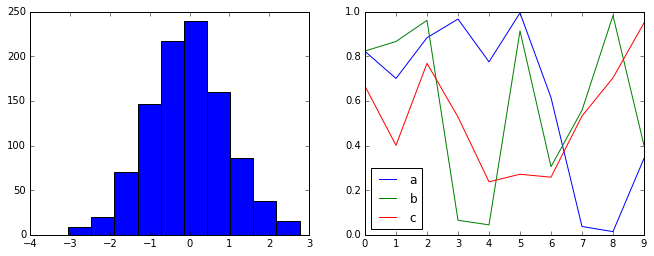

In [118]:
hist_and_lines()

### FiveThiryEight style

FiveThirtyEight 风格模仿的是著名网站 FiveThirtyEight(http://fivethirtyeight.com)的绘图 风格。如下图所示，这种风格使用深色的粗线条和透明的坐标轴:

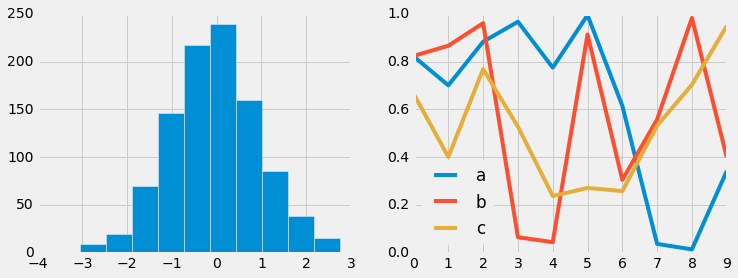

In [119]:
with plt.style.context('fivethirtyeight'):
    hist_and_lines()

### ggplot

R 语言的 ggplot 是非常流行的可视化工具，Matplotlib 的 ggplot 风格就是模仿这个程序包 的默认风格：

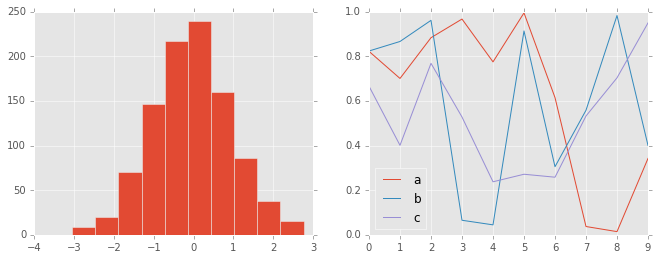

In [120]:
with plt.style.context('ggplot'):
    hist_and_lines()

### BMH style

有一本短小精悍的在线图书叫 Probabilistic Programming and Bayesian Methods for Hackers (http://bit.ly/2fDJsKC)。整本书的图形都是用 Matplotlib 创建的，通过一组 rc 参数创建了
一种引人注目的绘图风格。这个风格被 bmh 样式表继承了：

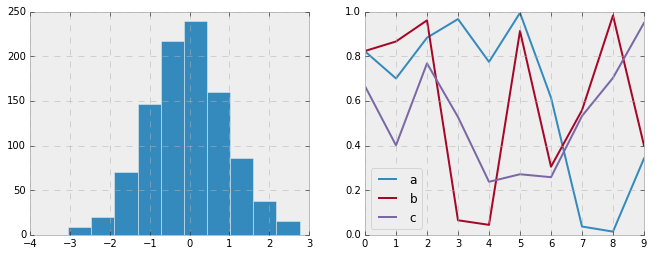

In [121]:
with plt.style.context('bmh'):
    hist_and_lines()

### Dark background

在演示文档中展示图形时，用黑色背景而非白色背景往往会取得更好的效果。dark_ background 风格就是为此设计的：

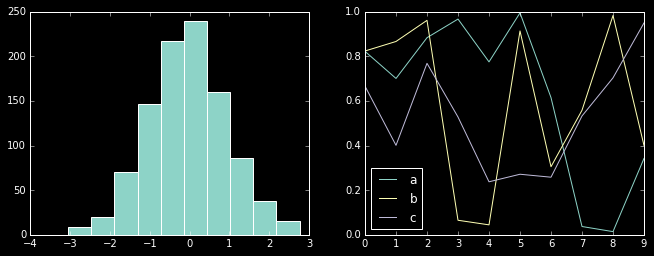

In [122]:
with plt.style.context('dark_background'):
    hist_and_lines()

### Grayscale

有时你可能会做一些需要打印的图形，不能使用彩色。这时使用 grayscale 风格的效果最好：

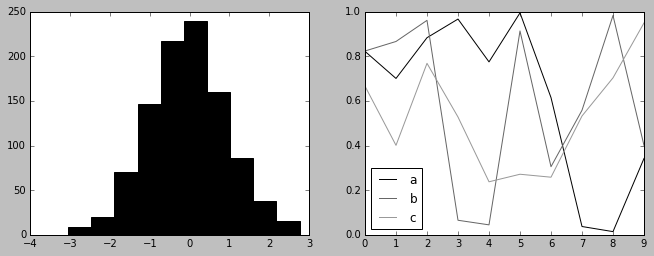

In [123]:
with plt.style.context('grayscale'):
    hist_and_lines()

### Seaborn style

Matplotlib 还有一些灵感来自 Seaborn 程序库的风格，这些风格 在 Notebook 导入 Seaborn 程序库后会自动加载。我觉得这些风格非常漂亮，也是我自己在探索数据时一直使用的默认风格:

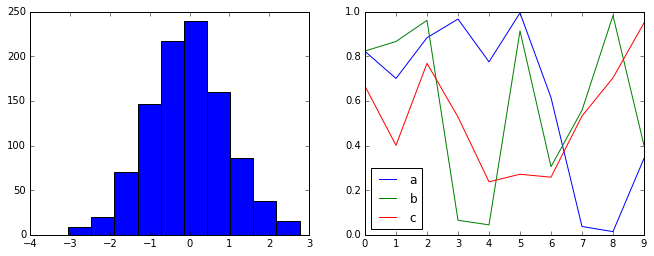

In [125]:
import seaborn
hist_and_lines()

通过运用各式各样的内置绘图风格，Matplotlib 在交互式可视化与创建印刷品图形两方面
都表现得越来越好。

# Three-Dimensional Plotting in Matplotlib

Matplotlib 原本只能画二维图。大概在 1.0 版本的时候，Matplotlib 实现了一些建立在二维 图基础上的三维图功能，于是一组画三维图可视化的便捷(尚不完美)工具便诞生了。我 们可以导入 Matplotlib 自带的 mplot3d 工具箱来画三维图：

In [126]:
from mpl_toolkits import mplot3d

导入这个子模块之后，就可以在创建任意一个普通坐标轴的过程中加入 projection='3d'
关键字，从而创建一个三维坐标轴:

In [127]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

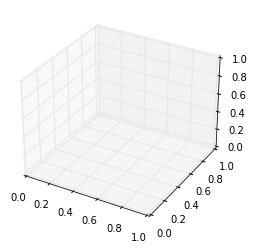

In [128]:
fig = plt.figure()
ax = plt.axes(projection='3d')

有了三维坐标轴之后，我们就可以在上面画出各种各样的三维图了。三维图的优点是 在 Notebook 里面可以交互浏览而非静止不动;和之前介绍的交互式图形一样，需要用 %matplotlib notebook 而不是 %matplotlib inline 运行代码。

## Three-dimensional Points and Lines

最基本的三维图是由 (x , y , z ) 三维坐标点构成的线图与散点图。与前面介绍的普通二维图 类似，可以用 ax.plot3D 与 ax.scatter3D 函数来创建它们。由于三维图函数的参数与前面 二维图函数的参数基本相同，因此你可以参考 4.3 节和 4.4 节的内容，获取关于控制输出 结果的更多信息。下面来画一个三角螺旋线(trigonometric spiral)，在线上随机分布一些散点：

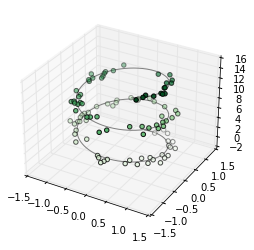

In [129]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

默认情况下，散点会自动改变透明度，以在平面上呈现出立体感。有时在静态图形上观察三维效果很费劲，通过交互视图(interactive view)就可以让所有数据点呈现出极佳的视觉效果。

## Three-dimensional Contour Plots

与之前介绍的等高线类似，mplot3d 也有用同样的输入数据创建三维晕渲(relief)图的工具。与二维 ax.contour 图形一样，ax.contour3D 要求所有数据都是二维网格数据的形式，并且由函数计算 z 轴数值。下面演示一个用三维正弦函数画的三维等高线图：

In [130]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

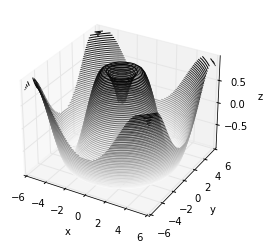

In [131]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

默认的初始观察角度有时不是最优的，view_init 可以调整观察角度与方位角(azimuthal angle)。在这个示例中，我们把俯仰角调整为 60 度(这里的 60 度 是 x-y 平面的旋转角度)，方位角调整为 35 度(就是绕 z 轴顺时针旋转 35 度):

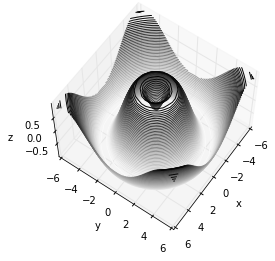

In [132]:
ax.view_init(60, 35)
fig

其实，也可以在 Matplotlib 的交互式后端界面直接通过点击、拖拽图形，实现同样的交互旋转效果。

## Wireframes and Surface Plots

还有两种画网格数据的三维图没有介绍，就是线框图和曲面图。它们都是将网格数据 映射成三维曲面，得到的三维形状非常容易可视化。下面是一个线框图示例：

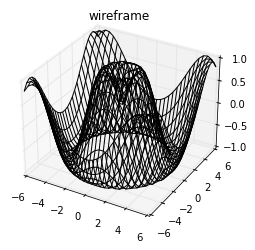

In [133]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe');

曲面图与线框图类似，只不过线框图的每个面都是由多边形构成的。只要增加一个配色方案来填充这些多边形，就可以让读者感受到可视化图形表面的拓扑结构了：

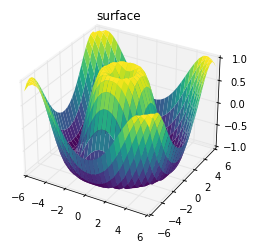

In [134]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

需要注意的是，画曲面图需要二维数据，但可以不是直角坐标系(也可以用极坐标)。下 面的示例创建了一个局部的极坐标网格(polar grid)，当我们把它画成 surface3D 图形时， 可以获得一种使用了切片的可视化效果：

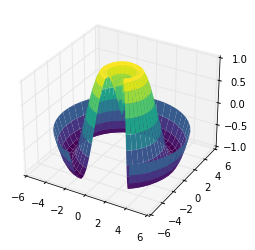

In [135]:
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)

X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none');

## Surface Triangulations

在某些应用场景中，上述这些要求均匀采样的网格数据显得太过严格且不太容易实现。这 时就可以使用三角剖分图形(triangulation-based plot)了。如果没有笛卡尔或极坐标网格 的均匀绘制图形，我们该如何用一组随机数据画图呢?

In [136]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)

可以先为数据点创建一个散点图，对将要采样的图形有一个基本认识：

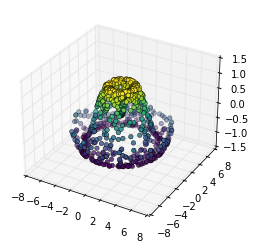

In [137]:
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5);

还有许多地方需要修补，这些工作可以由 ax.plot_trisurf 函数帮助我们完成。它首先找 到一组所有点都连接起来的三角形，然后用这些三角形创建曲面。结果如下图所示，其中 x、y 和 z 参数都是一维数组：

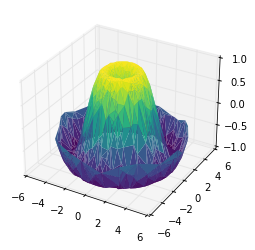

In [138]:
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z,
                cmap='viridis', edgecolor='none');

虽然结果肯定没有之前用均匀网格画的图完美，但是这种三角剖分方法很灵活，可以创建
各种有趣的三维图。例如，可以用它画一条三维的莫比乌斯带，下面就来进行演示。


### Example: Visualizing a Möbius strip

莫比乌斯带是把一根纸条扭转 180 度后，再把两头粘起来做成的纸带圈。从拓扑学的角度 看，莫比乌斯带非常神奇，因为它总共只有一个面!下面我们就用 Matplotlib 的三维工具 来画一条莫比乌斯带。此时的关键是想出它的绘图参数:由于它是一条二维带，因此需要 两个内在维度(intrinsic dimensions)。让我们把一个维度定义为 θ，取值范围为 0~2π;另 一个维度是 w，取值范围是 -1~1，表示莫比乌斯带的宽度:


In [139]:
theta = np.linspace(0, 2 * np.pi, 30)
w = np.linspace(-0.25, 0.25, 8)
w, theta = np.meshgrid(w, theta)

有了参数之后，我们必须确定带上每个点的直角坐标 ( x, y, z )。
仔细思考一下，我们可能会找到两种旋转关系:一种是圆圈绕着圆心旋转(角度用 θ 定 义)，另一种是莫比乌斯带在自己的坐标轴上旋转(角度用 Φ 定义)。因此，对于一条莫比 乌斯带，我们必然会有环的一半扭转 180 度，即 Δ Φ = Δ θ / 2。

In [140]:
phi = 0.5 * theta

现在用我们的三角学知识将极坐标转换成三维直角坐标。定义每个点到中心的距离(半 径)r，那么直角坐标 ( x, y, z ) 就是:

In [141]:
# radius in x-y plane
r = 1 + w * np.cos(phi)

x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(w * np.sin(phi))

最后，要画出莫比乌斯带，还必须确保三角剖分是正确的。最好的实现方法就是首先用基 本参数化方法定义三角剖分，然后用 Matplotlib 将这个三角剖分映射到莫比乌斯带的三维 空间里，这样就可以画出图形：

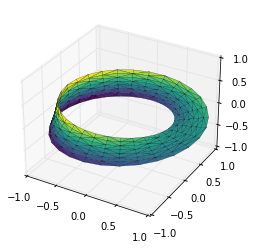

In [142]:
# triangulate in the underlying parametrization
from matplotlib.tri import Triangulation
tri = Triangulation(np.ravel(w), np.ravel(theta))

ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles,
                cmap='viridis', linewidths=0.2);

ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1);

将上面所有的 Matplotlib 函数组合起来，就可以创建出丰富多彩三维图案了。

# Geographic Data with Basemap

地理数据可视化是数据科学中一种十分常见的可视化类型。Matplotlib 做此类可视化的主
要工具是 Basemap 工具箱，它是 Matplotlib 的 mpl_toolkits 命名空间里的众多工具箱之一。坦白说，Basemap 用起来有点笨重，就算做点儿简单的可视化图也需要花费比预期更 长的时间。在处理比较复杂的地图可视化任务时，更现代的解决方案可能会更适用一些， 比如 leaflet 开发库或 Google Maps API。然而，Basemap 符合 Python 用户的使用习惯。本 节将演示一些利用 Basemap 工具箱绘制地图的可视化示例。
Basemap 安装起来很简单。如果你用 conda 命令，输入下面的命令即可，程序包会自动下 载并安装:
```
     $ conda install basemap
```
只需要在标准导入模板上新增一行即可:

In [144]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

安装并导入 Basemap 工具箱后，只用几行代码就可以画出地理图形(要想在 Python 2 中画 出如下图中所示的图形，需要安装 PIL 程序包，而在 Python 3 中则需要安装 pillow 程 序包):

In [ ]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5);

下面来介绍 Basemap 各个参数的含义。

这里显示的地球并不是一个静止的图形。它是一个用球面坐标系构建的、功能齐全的 Matplotlib 坐标轴，可以很轻易地在地图上增添数据!例如，我们可以将地图投影放大到 北美洲，然后标出西雅图的位置。用 ETOPO 地图(etopo image，显示陆地与海底的地形 特征)作为背景：

In [ ]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
x, y = m(-122.3, 47.6)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Seattle', fontsize=12);

这个示例让我们发现，只需要几行简单的 Python 代码就可以画出地理可视化图。下文将深 入介绍 Basemap 的主要特性，并通过一些可视化地图示例进行演示。有了这些示例作为基 础，你就可以制作几乎所有你需要的地图可视化图了。

## Map Projections

当你想使用地图时，首先要做的就是确定地图的投影类型。你可能已经知道，像地球这样
的球体，可以通过球面透视法将三维球面投影成一个二维平面，不会造成变形，也不会破坏其连续性。这些投影类型随着人类历史进程逐渐发展起来，现在已经有许多选择。根据 地图投影类型的不同用途，有一些地图特征(例如方向、面积、距离、形状或其他因素) 值得关注一下。
Basemap 程序包里面实现了几十种投影类型，所有投影都有一个简便格式码。下面对一些常用的投影类型进行简单的演示。

首先定义一个可以画带经纬线地图的简便方法:

In [ ]:
from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

### Cylindrical projections

圆柱投影(cylindrical projection)是最简单的地图投影类型，纬度线与经度线分别映射 成水平线与竖直线。采用这种投影类型的话，赤道区域的显示效果非常好，但是南北极 附近的区域就会严重变形。由于纬度线的间距会因圆柱投影的不同而不同，所以就有了 不同的投影属性和南北极附近不同的变形程度。我们在下图中画了一个等距圆柱投 影，不同纬度在子午线方向的间距保持不变。另外两种圆柱投影是墨卡托(Mercator， projection='merc')投影和圆柱等积(cylindrical equal-area，projection='cea')投影。

In [ ]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
draw_map(m)

Basemap 有一些用来设置左下角(llcrnr)和右上角(urcrnr)纬度(lat)和经度(lon)
的参数。

### Pseudo-cylindrical projections

伪圆柱投影(pseudo-cylindrical projection)的经线不再必须是竖直的，这样可以使南北 极附近的区域更加真实。摩尔威德(Mollweide，projection='moll')投影就是这类投影 的典型代表，它所有的经线都是椭圆弧线，如下图所示。这么做是为了保留地图原 貌——虽然南北极附近的区域还有一些变形，但是通过一些区域小图可以反映真实情况。 其他伪圆柱投影类型有正弦(sinusoidal，projection='sinu')投影和罗宾森(Robinson， projection='robin')投影。

In [ ]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='moll', resolution=None,
            lat_0=0, lon_0=0)
draw_map(m)

Basemap 提供了两个额外参数，用来表示地图中心的纬度(lat_0)和经度(lon_0)。

### Perspective projections

透视投影(perspective projection)是从某一个透视点对地球进行透视获得的投影，就好像 你站在太空中某一点给地球照相一样(通过技术处理，有些投影类型的透视点可以放在地 球上)。一个典型示例是正射(orthographic，projection='ortho')投影，从无限远处观 察地球的一侧。因此，这种投影一次只能显示半个地球。其他的透视投影类型还有球心(gnomonic，projection='gnom') 投影和球极平面(stereographic，projection='stere') 投影。这些投影经常用于显示地图的较小面积区域。
下面是一个正射投影示例:


In [ ]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None,
            lat_0=50, lon_0=0)
draw_map(m);

### Conic projections

圆锥投影(conic projection)是先将地图投影成一个圆锥体，然后再将其展开。这样做虽 然可以获得非常好的局部效果，但是远离圆锥顶点的区域可能会严重变形。一个典型示例 就是兰勃特等角圆锥投影(Lambert conformal conic projection，projection='lcc')，也就 是我们之前见到的北美洲地图。这种方法将地图投影成一个由两条标准纬线(用 Basemap 里的 lat_1 与 lat_2 参数设置)构成的圆锥，这两条纬线距离是经过精心挑选的，在两条 标准纬线之内比例尺逐渐减小，在两线之外的比例尺逐渐增大。其他常用的圆锥投影还有 等距圆锥(equidistant conic，projection='eqdc')投影和阿尔伯斯等积圆锥(Albers equal- area，projection='aea')投影，如下图所示。圆锥投影和透视投影一样，适合显示较 小与中等区域的地图。

In [ ]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            lon_0=0, lat_0=50, lat_1=45, lat_2=55,
            width=1.6E7, height=1.2E7)
draw_map(m)

### Other projections

如果你还需要做更多的地图可视化，那么我推荐你学习其他投影类型的知识，掌握它 们的属性、优点和不足。你可以在 Basemap 程序包(http://matplotlib.org/basemap/users/ mapsetup.html)文档里找到它们。如果你深入研究这方面的内容，肯定会发现一种让人难 以置信的地理可视化极客亚文化，这些极客会疯狂地将自己喜爱的投影类型推送给所有的 地图应用!

## Drawing a Map Background

前面介绍过，用 bluemarble() 和 shadedrelief() 方法可以画出地球投影，用 drawparallels() 和 drawmeridians() 方法可以画出纬线与经线。Basemap 程序包中有许多实用的函数，可 以画出各种地形的轮廓，如陆地、海洋、湖泊、河流、各国的政治分界线，甚至于美国各 州县的边界线。下面列举了一些画图函数，你可以通过 IPython 的帮助功能查看它们的具 体用法。

• 物理边界与水体 

drawcoastlines()
绘制大陆海岸线

drawlsmask()
 为陆地与海洋设置填充色，从而可以在陆地或海洋投影其他图像

drawmapboundary()
 绘制地图边界，包括为海洋填充颜色

drawrivers()
绘制河流

fillcontinents()
用一种颜色填充大陆，用另一种颜色填充湖泊(可选) 

• 政治边界

drawcountries()
绘制国界线

drawstates()
绘制美国州界线

drawcounties()
绘制美国县界线 

• 地图功能

drawgreatcircle()
在两点之间绘制一个大圆

drawparallels()
绘制纬线

drawmeridians()
绘制经线

drawmapscale()
在地图上绘制一个线性比例尺 

• 地球影像

bluemarble()
绘制 NASA 蓝色弹珠地球投影 

shadedrelief()
在地图上绘制地貌晕渲图

etopo()
在地图上绘制地形晕渲图

warpimage()
 将用户提供的图像投影到地图上

如果要使用边界特征，就必须在创建 Basemap 图形时设置分辨率。Basemap 类提供了 resolution 参数来设置边界的分辨率，可用值分别是 'c'(原始分辨率)、'l'(低分辨 率)、'i'(中等分辨率)、'h'(高分辨率)、'f'(全画质分辨率)，如果不使用边界线则用 None。这个参数的设置非常重要:如果为世界地图的边界线设置了高分辨率，那么图形渲 染会很慢。

下面是一个绘制海岸线的示例，来看看两种不同分辨率的绘制效果。我们为苏格兰美丽的天 空岛(Isle of Skye)创建了一张低分辨率地图和一张高分辨率地图。它位于北纬 57.3 度，西 经 6.2 度，用一张 90 000 公里×120 000 公里的地图可以画出来：


In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

for i, res in enumerate(['l', 'h']):
    m = Basemap(projection='gnom', lat_0=57.3, lon_0=-6.2,
                width=90000, height=120000, resolution=res, ax=ax[i])
    m.fillcontinents(color="#FFDDCC", lake_color='#DDEEFF')
    m.drawmapboundary(fill_color="#DDEEFF")
    m.drawcoastlines()
    ax[i].set_title("resolution='{0}'".format(res));

你会发现，低分辨率的海岸线不适合这个缩放尺度，而高分辨率的效果还不错。低分辨率 适合呈现全局视角，而且加载整幅图的速度要比高分辨率的边界数据快很多。要呈现某一 视角的时候，可能得多尝试几次才能找到最合适的分辨率——最好先从一个能快速呈现的 分辨率开始，然后不断提高分辨率直到满意为止。

## Plotting Data on Maps

Basemap 工具箱最实用的功能可能就是以地图为背景画上各种数据。使用任意 plt 函数就 可以在地图上画出简单的图形与文字;你可以用 Basemap 实例将纬度与经度坐标投影为直 角坐标系 (x, y)，就像前面在西雅图地图示例中介绍的那样。

除此之外，Basemap 实例中的许多方法都是与地图有关的函数。这些函数与标准 Matplotlib 函数的用法类似，只是都多了一个布尔参数 latlon。如果将它设置为 True，就表示使用原 来的经度纬度坐标，而不是投影为 (x, y) 坐标。

部分与地图有关的方法如下所示。

contour() / contourf() 
绘制等高线 / 填充等高线

imshow()
绘制一个图像

pcolor() / pcolormesh()
绘制带规则 / 不规则网格的伪彩图(pseudocolor plot)

plot()
绘制线条和 / 或标签

scatter()
绘制带标签的点

quiver()
绘制箭头

barbs()
绘制风羽(wind barb） 

drawgreatcircle()
绘制大圆圈 

下面用一些示例来演示。关于这些函数的更多信息，包括一些示例，都可以参考 Basemap
在线文档(http://matplotlib.org/basemap/)。

## Example: California Cities

我们在配置图例的部分演示过在散点图中通过散点大小与颜色的变化展示美国加州的城市位置、面积和人口。

接下来再次使用这幅图，只不过这次是在 Basemap 上实现这些内容。
首先，像之前那样加载数据:

In [ ]:
import pandas as pd
cities = pd.read_csv('data/california_cities.csv')

# Extract the data we're interested in
lat = cities['latd'].values
lon = cities['longd'].values
population = cities['population_total'].values
area = cities['area_total_km2'].values

然后，建立地图投影，绘制数据散点，并创建颜色条与图例：

In [ ]:
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          c=np.log10(population), s=area,
          cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3, 7)

# make legend with dummy points
for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');

这幅图基本呈现出了美国加州的人口密集区域为洛杉矶、旧金山等沿海地区，沿着平坦的
中央谷地(central valley)的高速公路延伸，几乎完全避开了沿州边界的山区。

## Example: Surface Temperature Data

下面再来演示一个数据更具有连续性的地理数据可视化——2014 年 1 月“极地涡旋” (polar vortex)袭击美国东部的案例。完整的历史气候数据可以在美国宇航局戈达德太空研究所(http://data.giss.nasa.gov/，NASA’s Goddard Institute for Space Studies)的网站找到。 我们将使用 GIS 250 气温数据，可以通过 shell 命令行下载(在 Windows 上需要修改该命令)。下面的数据是在 2016 年 12 月 6 日下载的，文件大小为 9MB 左右:

In [ ]:
# !curl -O http://data.giss.nasa.gov/pub/gistemp/gistemp250.nc.gz
# !gunzip gistemp250.nc.gz

数据是 NetCDF 格式，可以用 Python 的 netCDF4 程序库读取。安装命令如下所示: 
```
$ conda install netcdf4
```
先读取数据:

In [ ]:
from netCDF4 import Dataset
data = Dataset('gistemp250.nc')

文件里包含了大量全球气温数据，我们只需要选择 2014 年 1 月 15 日的数据:

In [ ]:
from netCDF4 import date2index
from datetime import datetime
timeindex = date2index(datetime(2014, 1, 15),
                       data.variables['time'])

然后，加载经度与纬度数据，并将气温也提取出来:

In [ ]:
lat = data.variables['lat'][:]
lon = data.variables['lon'][:]
lon, lat = np.meshgrid(lon, lat)
temp_anomaly = data.variables['tempanomaly'][timeindex]

最后，用 pcolormesh() 方法绘制数据的彩色网格。我们主要关注北美地区，用地貌晕渲 图作为背景。请注意，这里特地选用了发散(divergent)颜色条，有一个中间颜色表示 0， 两边的颜色分别表示负数值与正数值。我们还在图中浅浅地绘制了海岸 线作为参照:

In [ ]:
fig = plt.figure(figsize=(10, 8))
m = Basemap(projection='lcc', resolution='c',
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.shadedrelief(scale=0.5)
m.pcolormesh(lon, lat, temp_anomaly,
             latlon=True, cmap='RdBu_r')
plt.clim(-8, 8)
m.drawcoastlines(color='lightgray')

plt.title('January 2014 Temperature Anomaly')
plt.colorbar(label='temperature anomaly (°C)');

图中数据显示了局部地区在该月出现的极端天气情况。美国东部比正常情况冷很多，而西 部和阿拉斯加州比正常情况热很多。没有显示温度的区域是地图背景。


# Visualization with Seaborn

虽然 Matplotlib 已经证明了自己绝对是一款超级实用且流行的数据可视化工具，但是即 使骨灰粉也不得不承认它不支持的功能还有很多。Matplotlib 的三条主要“罪状”总结 如下。

• Matplotlib 2.0 之前版本的默认配置样式绝对不是用户的最佳选择。之前的默认样式还是 仿照 1999 年前后的 MATLAB，却一直在使用。

• Matplotlib 的 API 比较底层。虽然可以实现复杂的统计数据可视化，但是通常都需要写 大量的样板代码(boilerplate code)。

• 由于 Matplotlib 比 Pandas 早十几年，因此它并不是为 Pandas 的 DataFrame 设计的。为 了实现 Pandas 的 DataFrame 数据的可视化，你必须先提取每个 Series，然后通常还需 要将它们合并成适当的格式。如果有一个画图程序库可以智能地使用 DataFrame 的标签 画图，那一定会很棒。

这些问题的终结者就是 Seaborn(http://seaborn.pydata.org)。Seaborn 在 Matplotlib 的基础上 开发了一套 API，为默认的图形样式和颜色设置提供了理智的选择，为常用的统计图形定 义了许多简单的高级函数，并与 Pandas DataFrame 的功能有机结合。

说实话，Matplotlib 团队也一直在努力解决这些问题:现在 Matplotlib 中不仅增加了 plt. style 工具(详情请参见 4.13 节)，而且与 Pandas 数据也可以无缝衔接。Matplotlib 2.0 版已经带有对之前样式优化过的样式表。但是即使 Matplotlib 已经有了这些进步，Seaborn 仍 然是一款非常好用的附加组件。

## Seaborn Versus Matplotlib

下面用 Matplotlib 的经典图形样式和配色方案画一个简易的随机游走(random-walk)图。
首先，导入常用工具:

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

创建一些随机游走数据:

In [ ]:
# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

然后画一个简易图形:

In [ ]:
# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

尽管最终图形包含了我们想要表达的所有信息，但是其艺术效果并不让人满意，用 21 世
纪的数据可视化审美眼光来看甚至有些过时。

现在尝试用 Seaborn 来实现。我们会发现，Seaborn 不仅有许多高级的画图功能，而且可 以改写 Matplotlib 的默认参数，从而用简单的 Matplotlib 脚本获得更好的效果。可以用 Seaborn 的 set() 方法设置样式。为简便起见，将 Seaborn 导入简记为 sns:


In [ ]:
import seaborn as sns
sns.set()

现在，重新运行之前的两行画图代码:

In [ ]:
# same plotting code as above!
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

效果确实更好!

## Exploring Seaborn Plots

Seaborn 的主要思想是用高级命令为统计数据探索和统计模型拟合创建各种图形。
下面将介绍一些 Seaborn 中的数据集和图形类型。虽然所有这些图形都可以用 Matplotlib 命令实现(其实 Matplotlib 就是 Seaborn 的底层)，但是用 Seaborn API 会更方便。

### Histograms, KDE, and densities

在进行统计数据可视化时，我们通常想要的就是频次直方图和多变量的联合分布图。在 Matplotlib 里面我们已经见过，相对比较简单:

In [ ]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], normed=True, alpha=0.5)

除了频次直方图，我们还可以用 KDE 获取变量分布的平滑估计。Seaborn 通过 sns.
kdeplot 实现:

In [ ]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

用 distplot 可以让频次直方图与 KDE 结合起来:

In [ ]:
sns.distplot(data['x'])
sns.distplot(data['y']);

如果向 kdeplot 输入的是二维数据集，那么就可以获得一个二维数据可视化图:

In [ ]:
sns.kdeplot(data);

用 sns.jointplot 可以同时看到两个变量的联合分布与单变量的独立分布。在这个图形中，
使用白色背景:

In [ ]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde');

可以向 jointplot 函数传递一些参数。例如，可以用六边形块代替频次直方图:

In [ ]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='hex')

### Pair plots

当你需要对多维数据集进行可视化时，最终都要使用矩阵图(pair plot)。如果想画出所有 变量中任意两个变量之间的图形，用矩阵图探索多维数据不同维度间的相关性非常有效。

下面将用著名的鸢尾花数据集来演示，其中有三种鸢尾花的花瓣与花萼数据:

In [ ]:
iris = sns.load_dataset("iris")
iris.head()

可视化样本中多个维度的关系非常简单，直接用 sns.pairplot 即可:

In [ ]:
sns.pairplot(iris, hue='species', size=2.5);

### Faceted histograms

有时观察数据最好的方法就是借助数据子集的频次直方图。Seaborn 的 FacetGrid 函数让 这件事变得非常简单。
来看看某个餐厅统计的服务员收取小费的数据:

In [ ]:
tips = sns.load_dataset('tips')
tips.head()

In [ ]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

### Factor plots

因子图(factor plot)也是对数据子集进行可视化的方法。你可以通过它观察一个参数在另一个参数间隔中的分布情况:


In [ ]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

### Joint distributions

与前面介绍的矩阵图类似，可以用 sns.jointplot 画出不同数据集的联合分布和各数据本身的分布:

In [ ]:
with sns.axes_style('white'):
    sns.jointplot("total_bill", "tip", data=tips, kind='hex')

联合分布图也可以自动进行 KDE 和回归:

In [ ]:
sns.jointplot("total_bill", "tip", data=tips, kind='reg');

### Bar plots

时间序列数据可以用 sns.factorplot 画出条形图。在下面的示例中，我们将用一些行星的数据来演示:

In [ ]:
planets = sns.load_dataset('planets')
planets.head()

In [ ]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)

我们还可以对比用不同方法(method 参数)发现行星的数量：

In [ ]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=4.0, kind='count',
                       hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

关于用 Seaborn 画图的更多信息，请参考 Seaborn 文档(http://seaborn.pydata.org)、教程(http://stanford.edu/~mwaskom/software/seaborn/tutorial.html)和Seaborn画廊(http://stanford.edu/~mwaskom/software/seaborn/examples/index.html)。

## Example: Exploring Marathon Finishing Times

下面将用 Seaborn 对一场马拉松比赛的成绩进行可视化。首先从数据源网站上抓取数据， 然后把数据进行汇总并去掉敏感信息，最后放在 GitHub 上供读者下载。下面从 GitHub 网站下载数据，并加载到 Pandas 中:

In [ ]:
# !curl -O https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv

In [ ]:
data = pd.read_csv('marathon-data.csv')
data.head()

默认情况下，Pandas 会把时间列加载为 Python 字符串格式(类型是 object)。可以用 DataFrame 的 dtypes 属性查看类型:

In [ ]:
data.dtypes

写一个把字符串转换成时间类型的函数:

In [ ]:
import datetime

def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return datetime.timedelta(hours=h, minutes=m, seconds=s)

data = pd.read_csv('marathon-data.csv',
                   converters={'split':convert_time, 'final':convert_time})
data.head()

In [ ]:
data.dtypes

这样看着好多了。为了能使用 Seaborn 画图，还需要添加一列，将时间换算成秒:

In [ ]:
data['split_sec'] = data['split'].astype(int) / 1E9
data['final_sec'] = data['final'].astype(int) / 1E9
data.head()

现在可以通过 jointplot 函数画图，从而对数据有个认识:

In [ ]:
with sns.axes_style('white'):
    g = sns.jointplot("split_sec", "final_sec", data, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000),
                    np.linspace(8000, 32000), ':k')

图中的实点线表示一个人全程保持一个速度跑完马拉松，即上半程与下半程耗时相同。然 而实际的成绩分布表明，绝大多数人都是越往后跑得越慢(也符合常理)。如果你参加过 跑步比赛，那么就一定知道有些人在比赛的后半程速度更快——也就是在比赛中“后半程加速”。

创建一列(split_frac，split fraction)来表示前后半程的差异，衡量比赛选手后半程加速 或前半程加速的程度:

In [ ]:
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']
data.head()

如果前后半程差异系数(split difference)小于 0，就表示这个人是后半程加速型选手。让我们画出差异系数的分布图:

In [ ]:
sns.distplot(data['split_frac'], kde=False);
plt.axvline(0, color="k", linestyle="--");

In [ ]:
sum(data.split_frac < 0)

在大约 4 万名马拉松比赛选手中，只有 250 个人能做到后半程加速。 

再来看看前后半程差异系数与其他变量有没有相关性。用一个矩阵图 pairgrid 画出所有变
量间的相关性:

In [ ]:
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'],
                 hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

从图中可以看出，虽然前后半程差异系数与年龄没有显著的相关性，但是与比赛的最终成 绩有显著的相关性:全程耗时最短的选手，往往都是在前后半程尽量保持节奏一致、耗时 非常接近的人。(由图可知，Seaborn 也没有完全克服 Matplotlib 图形样式的不足:这里主 要是 x 轴刻度值重叠的问题。但由于这是一个比较简单的 Matplotlib 图形，我们可以按照之前介绍的方法调整刻度值。)

对比男女选手之间的差异是件有趣的事情。来看这两组选手前后半程差异系数的频次直方图:

In [ ]:
sns.kdeplot(data.split_frac[data.gender=='M'], label='men', shade=True)
sns.kdeplot(data.split_frac[data.gender=='W'], label='women', shade=True)
plt.xlabel('split_frac');

有趣的是，在前后半程耗时接近的选手中，男选手比女选手要多很多!男女选手的分布看 起来几乎都是双峰分布。我们将男女选手不同年龄(age)的分布函数画出来，看看会得到 什么启示。

用小提琴图(violin plot)进行这两种分布的对比是个不错的办法：

In [ ]:
sns.violinplot("gender", "split_frac", data=data,
               palette=["lightblue", "lightpink"]);

这是另一种对比男女选手前后半程差异系数分布情况的方式。

让我们再仔细看看这幅图，对比两个由年龄构成函数的小提琴图。在数组中创建一个新列，表示每名选手的年龄段：

In [ ]:
data['age_dec'] = data.age.map(lambda age: 10 * (age // 10))
data.head()

In [ ]:
men = (data.gender == 'M')
women = (data.gender == 'W')

with sns.axes_style(style=None):
    sns.violinplot("age_dec", "split_frac", hue="gender", data=data,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);

通过上图可以看出男女选手的分布差异:20 多岁至 50 多岁各年龄段的男选手的前后半程
差异系数概率密度都比同年龄段的女选手低一些(或者可以说任意年龄都如此)。

还有一个令人惊讶的地方是，所有八十岁以上的女选手都比同年龄段的男选手的表现好。 这可能是由于这个年龄段的选手寥寥无几，样本太少:

In [ ]:
(data.age > 80).sum()

让我们再看看后半程加速型选手的数据:他们都是谁?前后半程差异系数与比赛成绩正相 关吗?我们可以轻松画出图形。下面用 regplot 为数据自动拟合一个线性回归模型：

In [ ]:
g = sns.lmplot('final_sec', 'split_frac', col='gender', data=data,
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":");

似乎有显著后半程加速的选手都是比赛成绩在 15 000 秒，即 4 小时之内的种子选手。低于这个成绩的选手很少有显著的后半程加速。

# Further Resources

## Matplotlib Resources

仅靠以上内容不可能完全覆盖 Matplotlib 的功能与图形类型。在探索 Matplotlib 的 API 时，使用 IPython 的 Tab 键补全和帮助功能会非常有效。另外，Matplotlib 的在线文档(http://matplotlib.org/)也是非常有用的参考资料。尤其是 Matplotlib 画廊(http://matplotlib.org/gallery.html)页面中的内容——它里面有几百张不同图形类型的缩略图，每张图都链接到一个用于制作图形的 Python 代码页面。通过这种方式，你就可以直接观察并学习各种不同的绘图样式与可视化技术了。

如果要推荐一本关于 Matplotlib 的参考书，那么我推荐 Interactive Applications Using Matplotlib (http://bit.ly/2fSqswQ)，作者是 Matplotlib 的核心开发者 Ben Root。


## Other Python Graphics Libraries

虽然 Matplotlib 是最知名的 Python 可视化程序库，但其实还有许多现代画图工具也值得一
 探究竟。下面简单介绍几个程序库。

• Bokeh(http://bokeh.pydata.org)是一个用 Python 做前端的 JavaScript 可视化程序库，支 持非常强大的交互可视化功能，可以处理非常大的批数据和 / 或流数据。Python 前端会 生成一份 JSON 数据结构，通过 Bokeh 的 JS 引擎进行渲染。

• Plotly(http://plot.ly)是 Plotly 公司开发的同名开源产品，其设计理念与 Bokeh 类似。 由于 Plotly 从一开始就是主打产品，因此得到了高水平的开发支持。可以免费使用。

• Vispy(http://vispy.org/)是一个侧重于大数据动态可视化的项目。由于它建立在
OpenGL 接口上并且可以充分利用电脑的显卡，因此可以渲染出令人叹为观止的大型数
据可视化图。

• Vega(https://vega.github.io/)与 Vega-Lite(https://vega.github.io/vega-lite)采用声明式
(declarative)图形表示方法，是在数据可视化基础语言多年的研究成果上形成的产品。 最终图形渲染是 JavaScript，但是 API 与编程语言无关。这就是用 Altair 程序包(http:// altair-viz.github.io/)实现的 Python API。虽然目前还不成熟，但我依然因这款产品也许 可以为 Python 和其他编程语言提供相同的数据可视化基础理念而兴奋不已。
